# Dataset
Exoplanet dataset is retrieved from http://exoplanetarchive.ipac.caltech.edu on Sun Feb 26 04:31:47 2023 West Standard Time. They are:
- Confirmed exoplanets: 5272 rows, 92 columns
- Planet emission spectrum: 574 rows, 14 columns
- Planet transit spectrum: 5745 rows, 22 columns

Depending on models used in later analysis, some columns are subject to be dropped or cleaned. But we keep all columns for now in case
for new models. The following analysis is based on the confirmed exoplanets dataset. 

# Variables 
| Variable | Description | Unit |
| --- | --- | --- |
| pl_name | Planet Name |  |
| hostname | Host Name |  |
| default_flag | Default Parameter Set |  |
| sy_snum | Number of Stars |  |
| sy_pnum | Number of Planets |  |
| discoverymethod | Discovery Method |  |
| disc_year | Discovery Year |  |
| disc_facility | Discovery Facility |  |
| soltype | Solution Type |  |
| pl_controv_flag | Controversial Flag |  |
| pl_refname | Planetary Parameter Reference |  |
| pl_orbper | Orbital Period | days |
| pl_orbpererr1 | Orbital Period Upper Unc. | days |
| pl_orbpererr2 | Orbital Period Lower Unc. | days |
| pl_orbperlim | Orbital Period Limit Flag |  |
| pl_orbsmax | Orbit Semi-Major Axis | au |
| pl_orbsmaxerr1 | Orbit Semi-Major Axis Upper Unc. | au |
| pl_orbsmaxerr2 | Orbit Semi-Major Axis Lower Unc. | au |
| pl_orbsmaxlim | Orbit Semi-Major Axis Limit Flag |  |
| pl_rade | Planet Radius | Earth Radius |
| pl_radeerr1 | Planet Radius Upper Unc. | Earth Radius |
| pl_radeerr2 | Planet Radius Lower Unc. | Earth Radius |
| pl_radelim | Planet Radius Limit Flag |  |
| pl_radj | Planet Radius | Jupiter Radius |
| pl_radjerr1 | Planet Radius Upper Unc. | Jupiter Radius |
| pl_radjerr2 | Planet Radius Lower Unc. | Jupiter Radius |
| pl_radjlim | Planet Radius Limit Flag |  |
| pl_bmasse | Planet Mass or Mass*sin(i) | Earth Mass |
| pl_bmasseerr1 | Planet Mass or Mass*sin(i) Upper Unc. | Earth Mass |
| pl_bmasseerr2 | Planet Mass or Mass*sin(i) Lower Unc. | Earth Mass |
| pl_bmasselim | Planet Mass or Mass*sin(i) Limit Flag | Earth Mass |
| pl_bmassj | Planet Mass or Mass*sin(i) | Jupiter Mass |
| pl_bmassjerr1 | Planet Mass or Mass*sin(i) Upper Unc. | Jupiter Mass |
| pl_bmassjerr2 | Planet Mass or Mass*sin(i) Lower Unc. | Jupiter Mass |
| pl_bmassjlim | Planet Mass or Mass*sin(i) Limit Flag | Jupiter Mass |
| pl_bmassprov | Planet Mass or Mass*sin(i) Provenance |  |
| pl_orbeccen | Eccentricity |  |
| pl_orbeccenerr1 | Eccentricity Upper Unc. |  |
| pl_orbeccenerr2 | Eccentricity Lower Unc. |  |
| pl_orbeccenlim | Eccentricity Limit Flag |  |
| pl_insol | Insolation Flux | Earth Flux |
| pl_insolerr1 | Insolation Flux Upper Unc. | Earth Flux |
| pl_insolerr2 | Insolation Flux Lower Unc. | Earth Flux |
| pl_insollim | Insolation Flux Limit Flag |  |
| pl_eqt | Equilibrium Temperature | K |
| pl_eqterr1 | Equilibrium Temperature Upper Unc. | K |
| pl_eqterr2 | Equilibrium Temperature Lower Unc. | K |
| pl_eqtlim | Equilibrium Temperature Limit Flag |  |

## Missing values analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
import pandas as pd
import numpy as np

# Read the datasets
df = pd.read_csv("data/imputed_5272.csv")

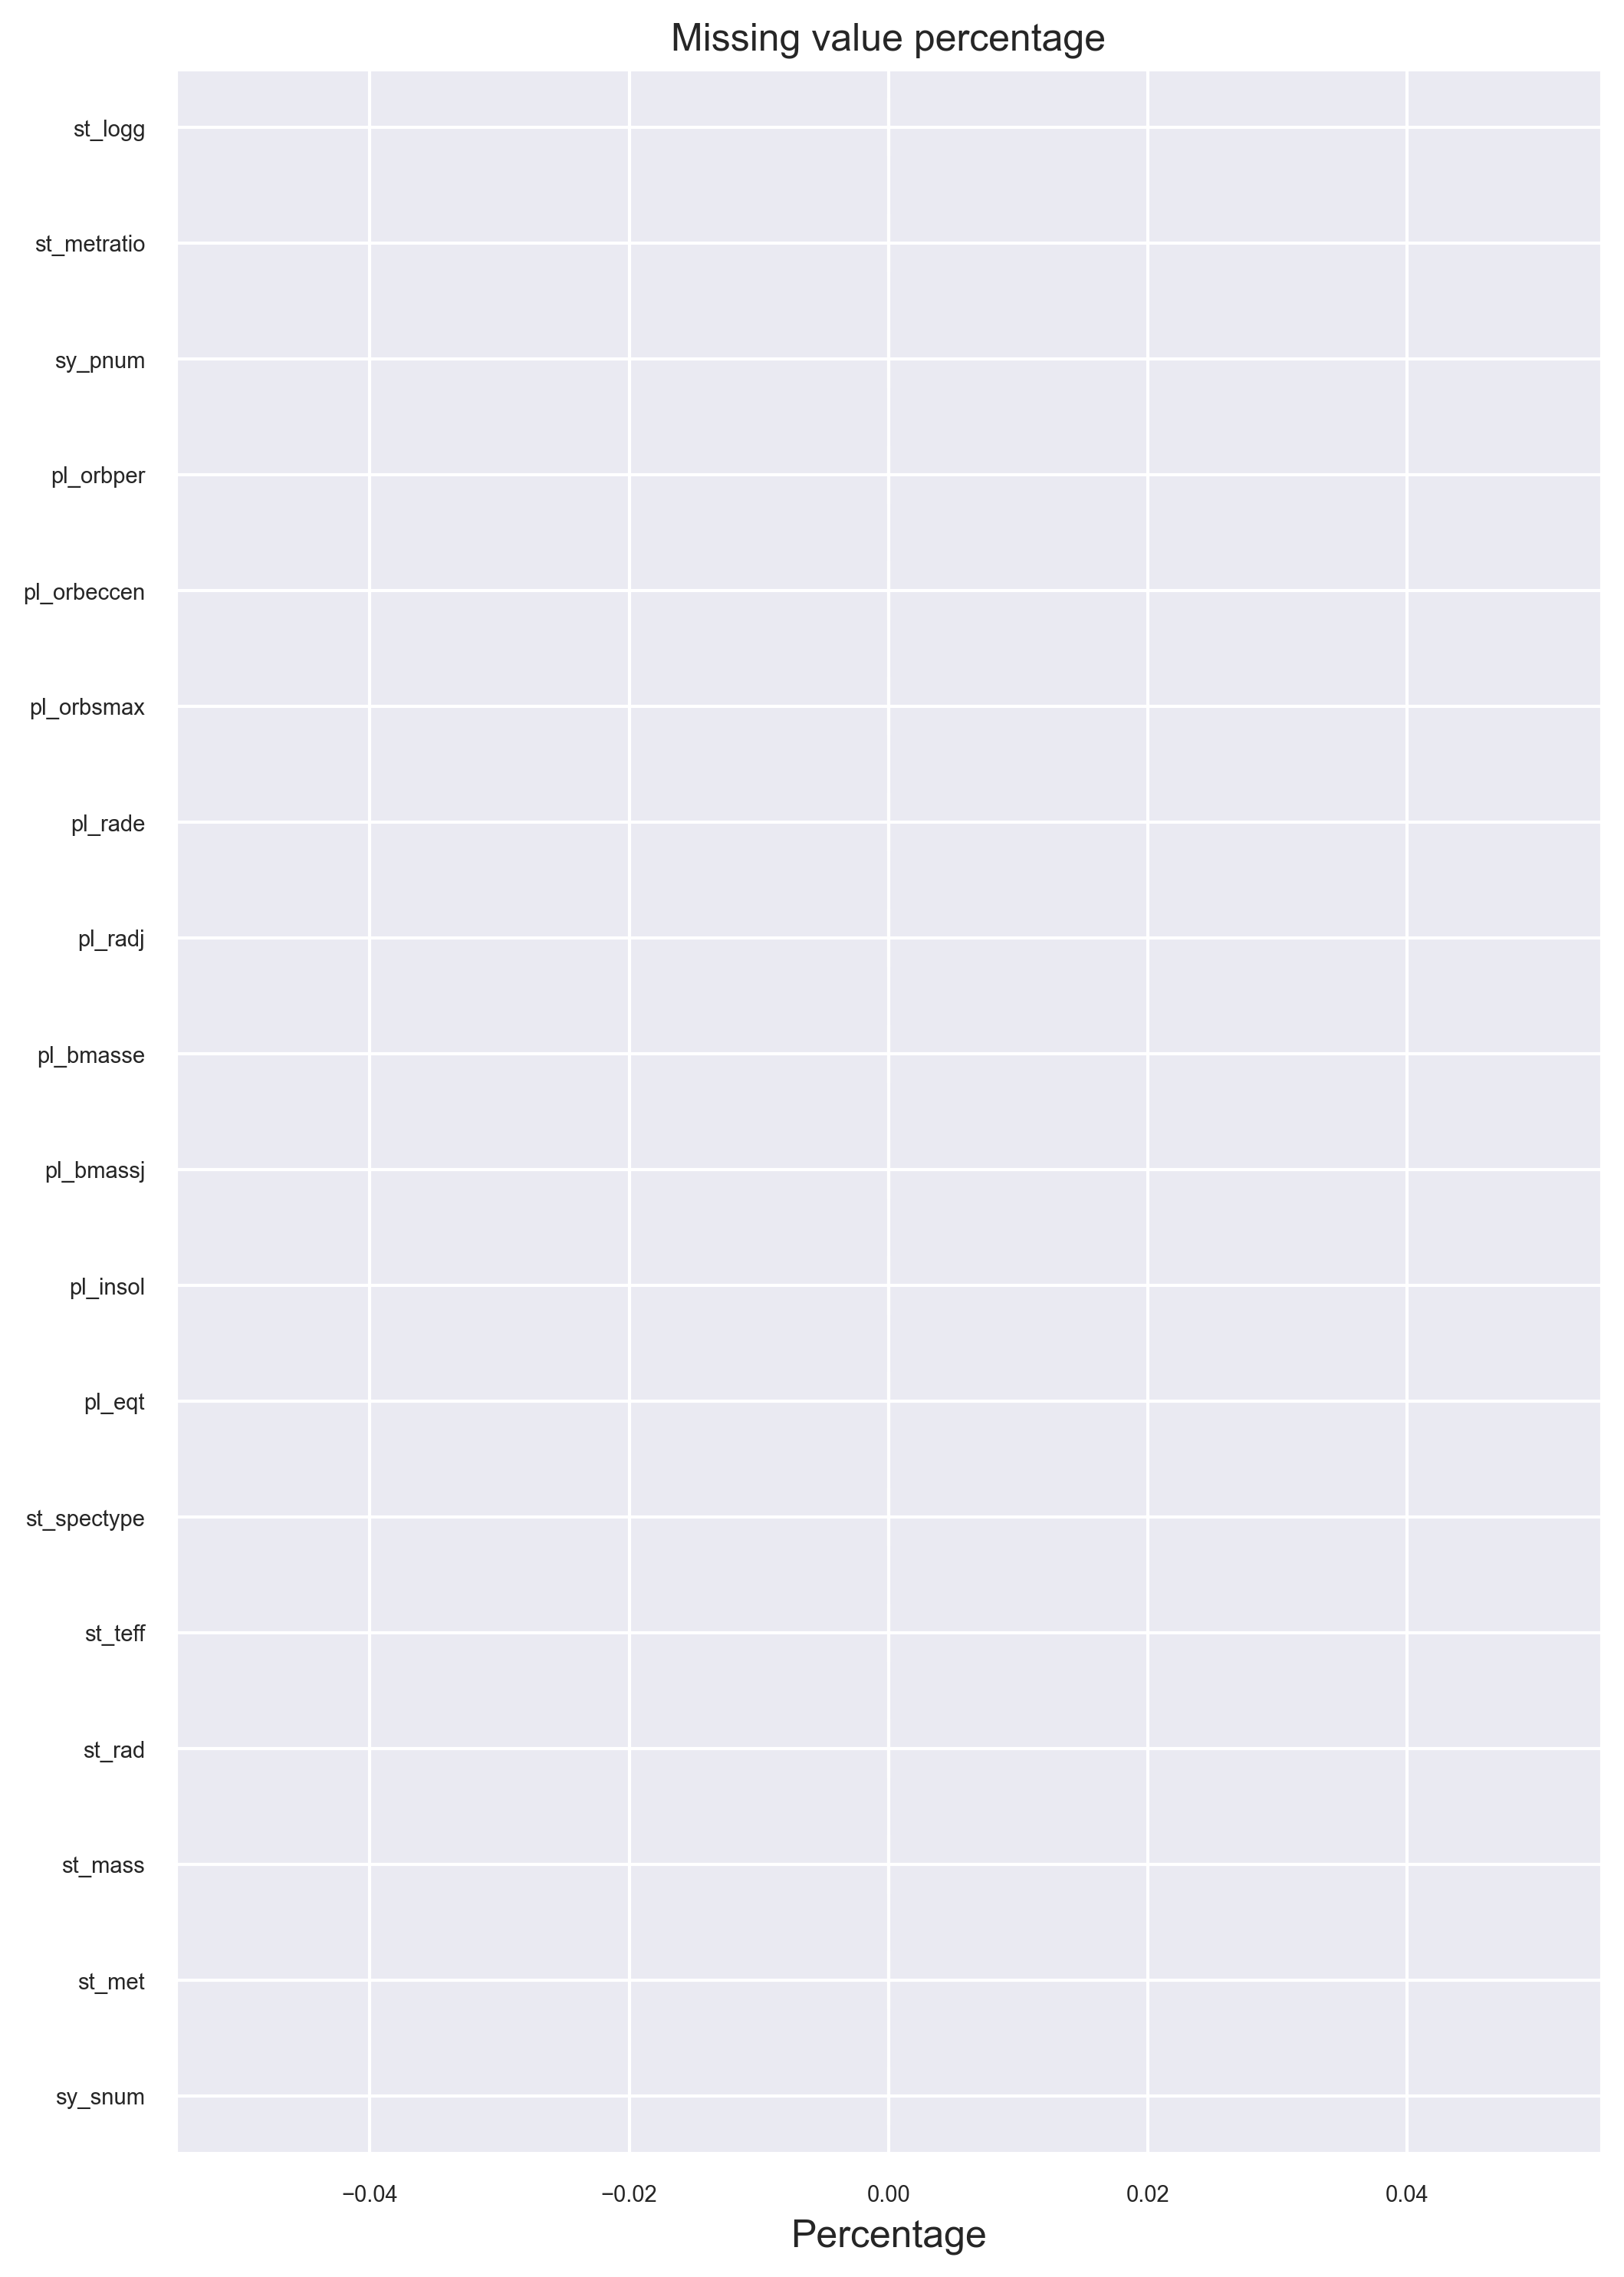

In [3]:
fig, ax = plt.subplots(figsize=(8,12), dpi=300)
(df.isna().sum()/len(df)).sort_values().plot(kind='barh', ax=ax)
ax.set_title('Missing value percentage')
ax.set_xlabel('Percentage')
ax.tick_params(axis='both', which='major', labelsize=7)

## Summary on missing values
Some variables have a high percentage of missing values. We need to be careful when using these variables in later analysis. 

## Distribution of some interesting variables
### Number of host stars

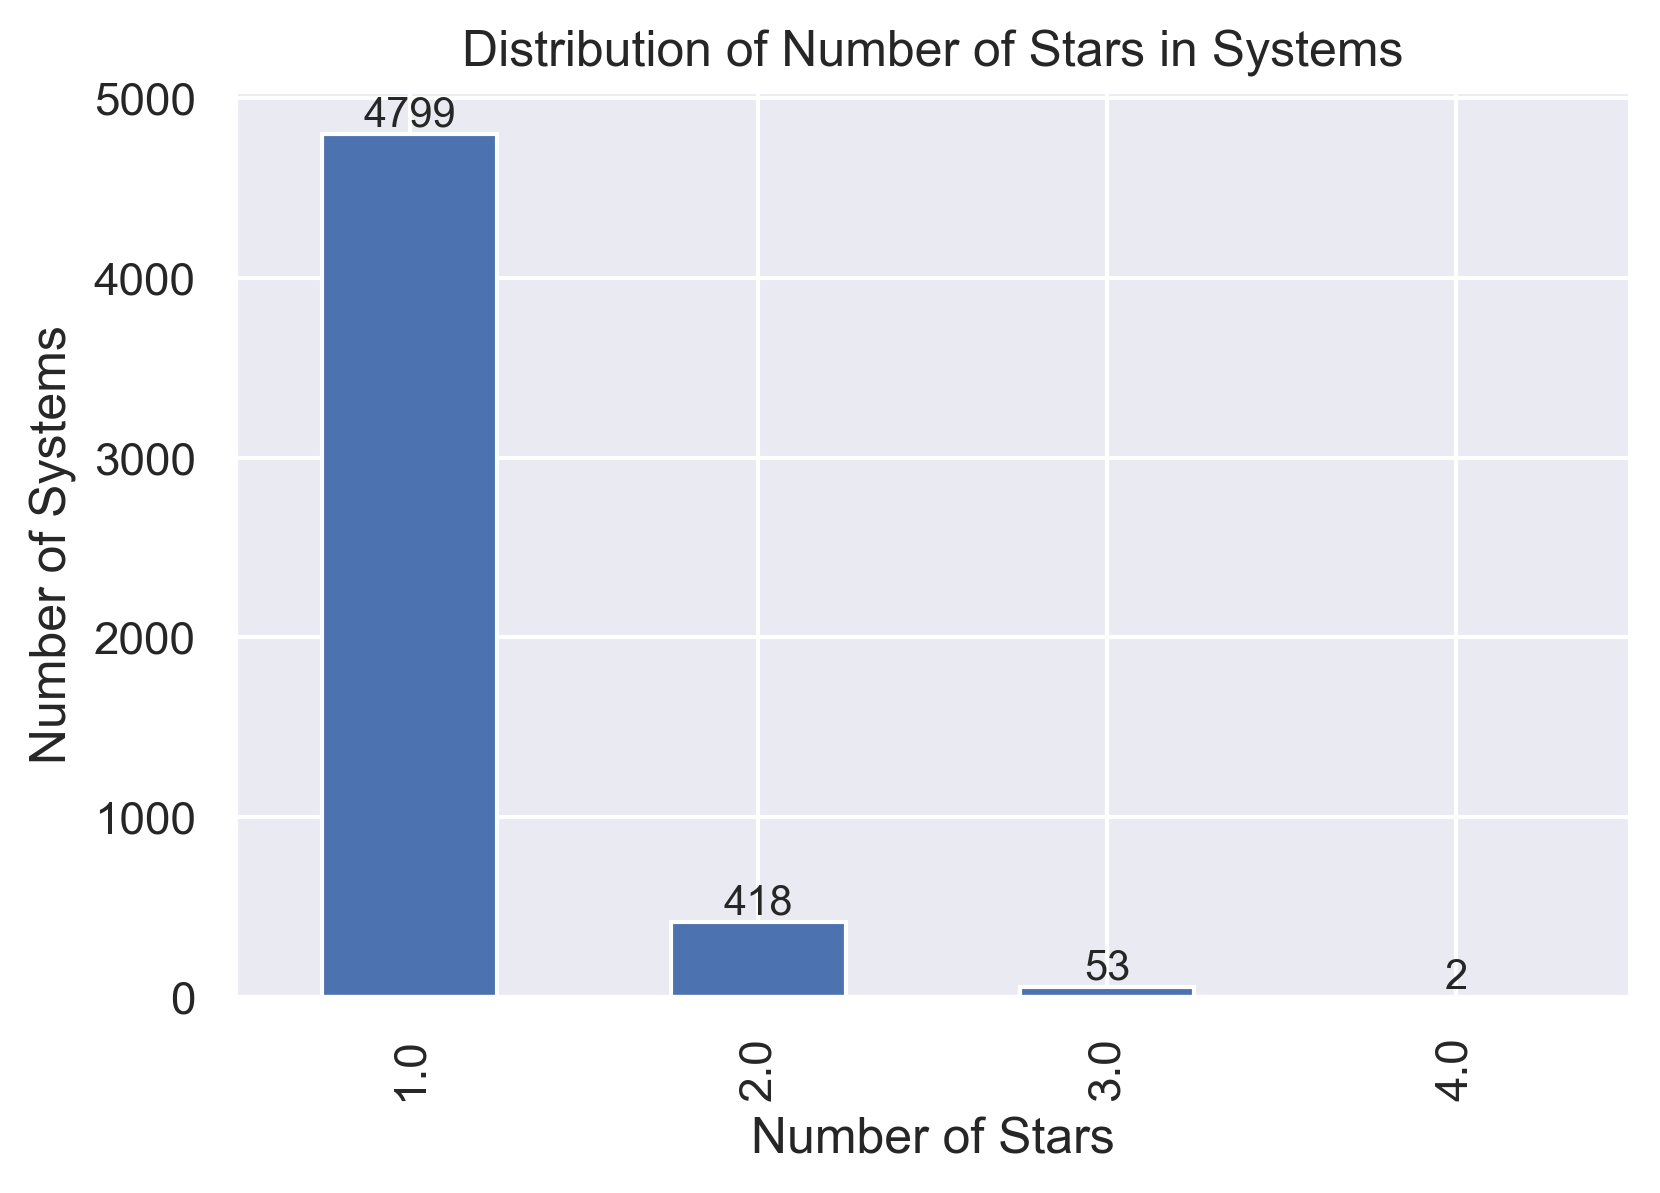

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of stars
ax = df['sy_snum'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Number of Stars')
ax.set_ylabel('Number of Systems')
ax.set_title('Distribution of Number of Stars in Systems')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

As expected, Unary star system is most common in the exoplanet dataset, followed by binary and trinary star system.
### Number of planets

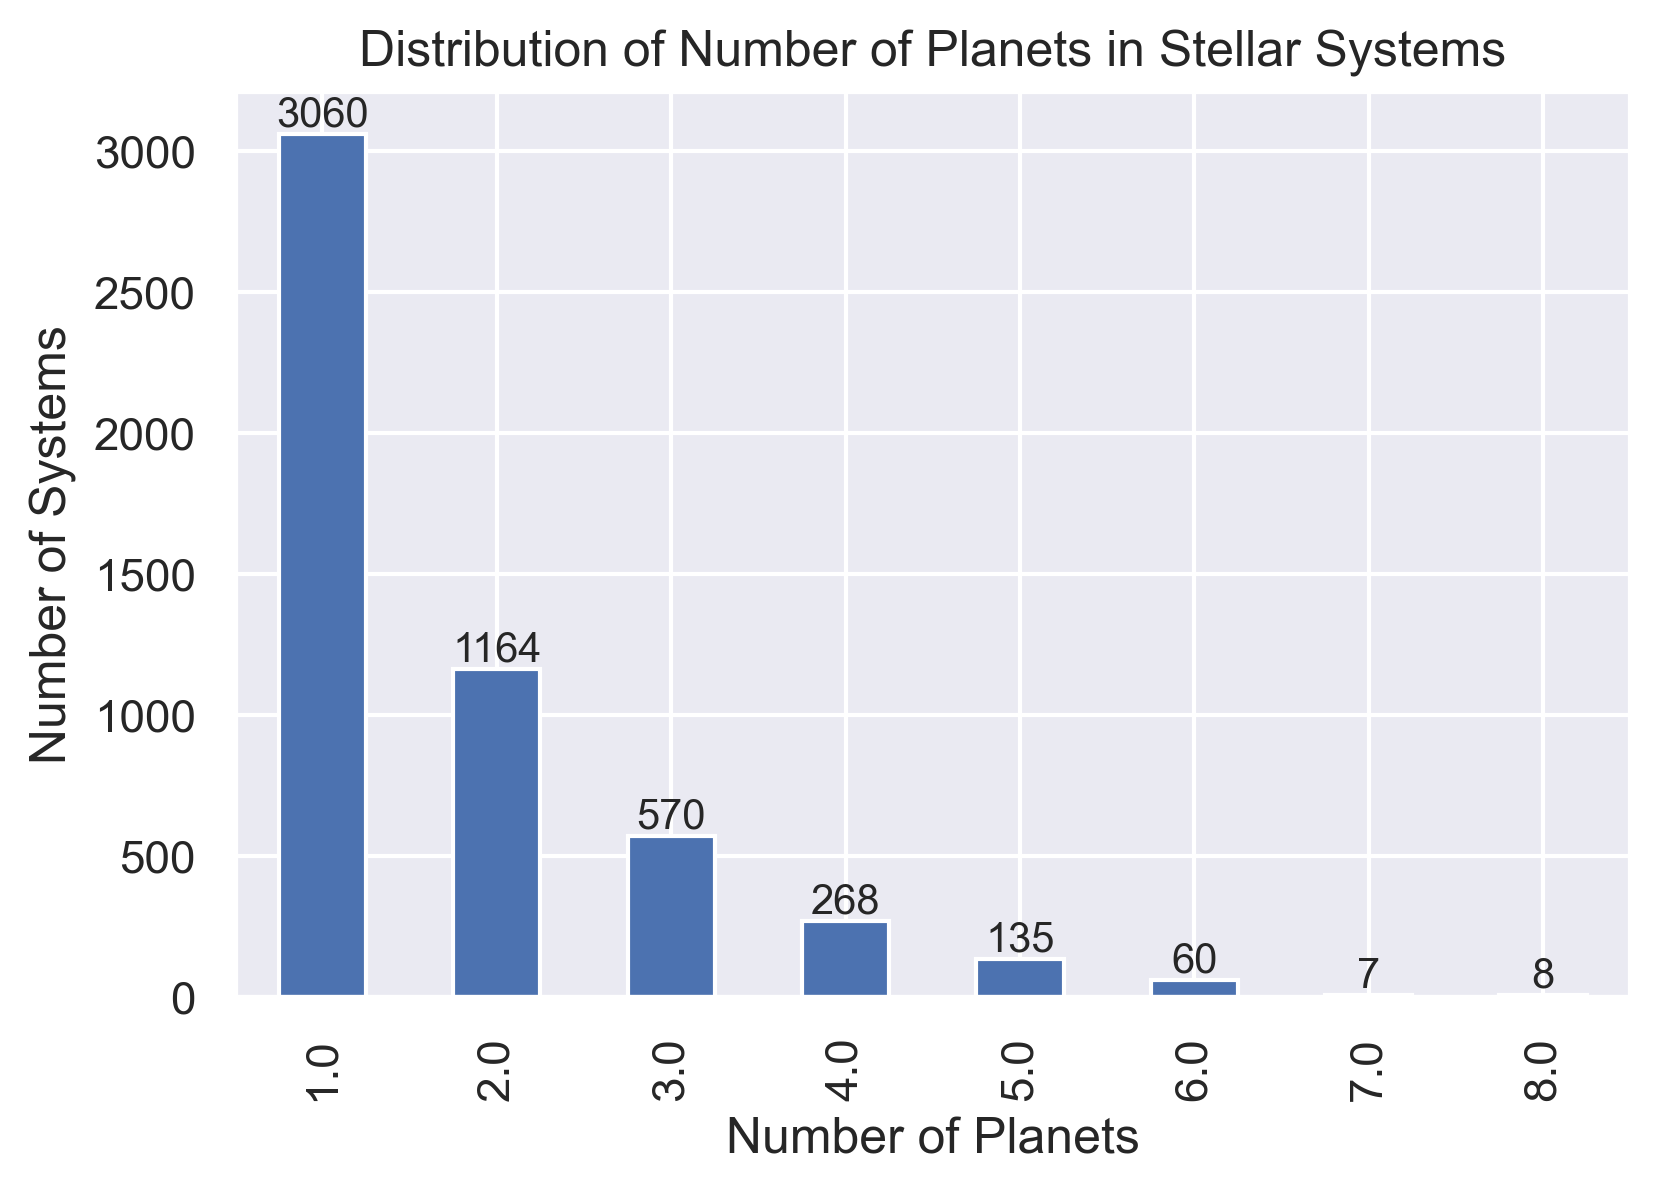

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of planets.
ax = df['sy_pnum'].value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_xlabel('Number of Planets')
ax.set_ylabel('Number of Systems')
ax.set_title('Distribution of Number of Planets in Stellar Systems')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)


Text(0, 0.5, 'Percentage')

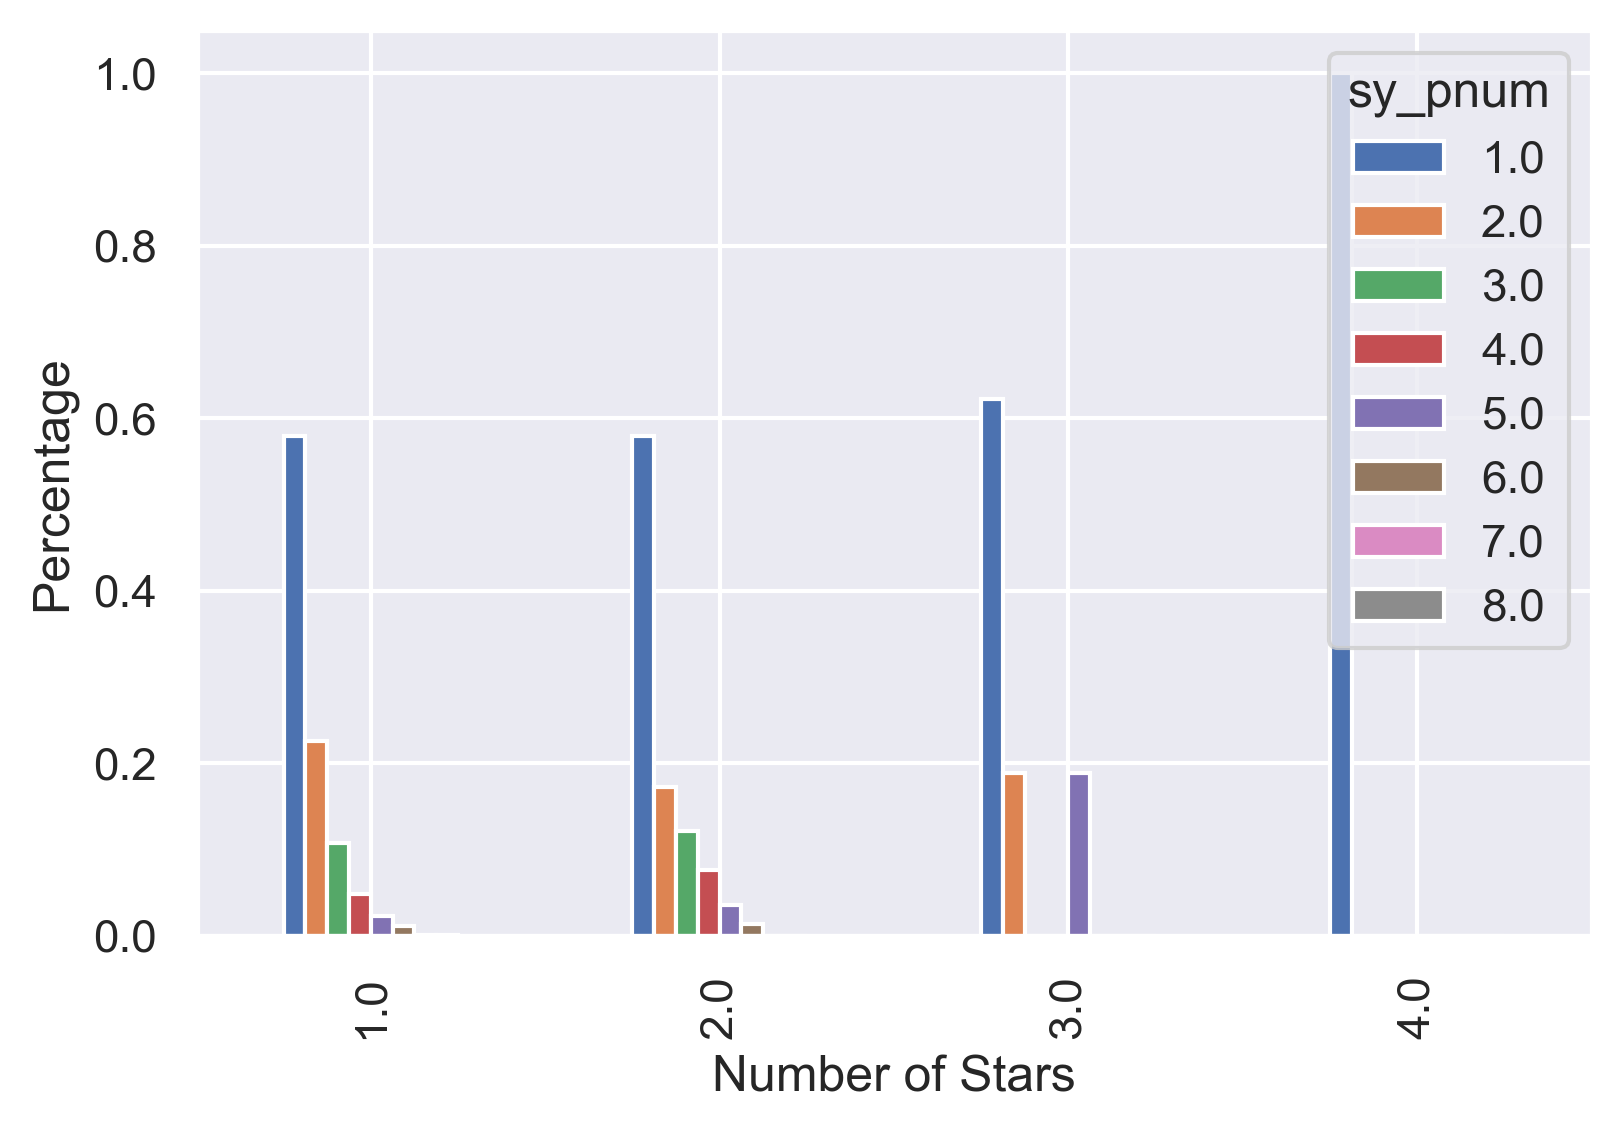

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of planets unary and binary systems y-axis is percentage
df.groupby('sy_snum')['sy_pnum'].value_counts(normalize=True).unstack().plot(kind='bar', ax=ax)

ax.set_xlabel('Number of Stars')
ax.set_ylabel('Percentage')

For the unary and binary star system, number of planets seem to follow the same distribution. But it seems that higher order stellar system tend to have fewer planets. But it could also be attributed to less data for higher order stellar systems (`53` trinary systems and only `2` quadruple star systems). 
### Mass of planets

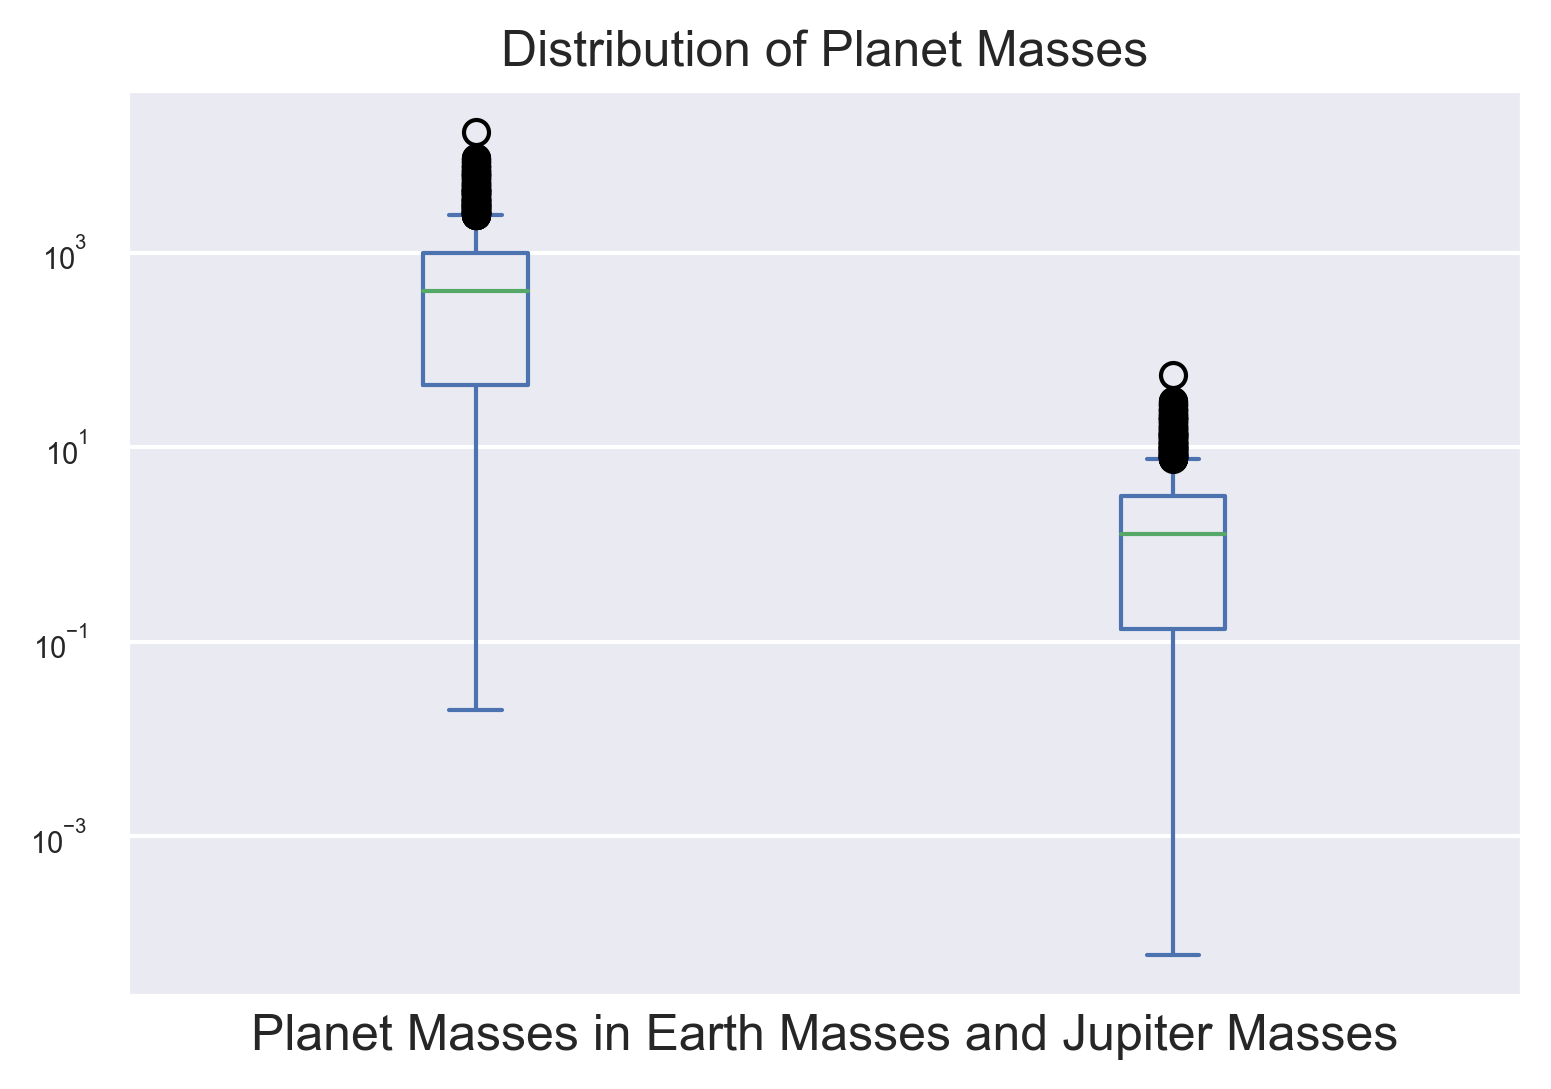

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# plot box plot of mass distribution of planets
ax = df[['pl_bmasse','pl_bmassj']].plot(kind='box', ax=ax)
ax.set_title('Distribution of Planet Masses')
ax.set_xlabel('Planet Masses in Earth Masses and Jupiter Masses')
ax.set_yscale('log')
ax.set_xticks([])
ax.tick_params(axis='both', which='major', labelsize=7)

## Variable dependency analysis
### Bias of discovery methods

ValueError: Could not interpret value `discoverymethod` for parameter `hue`

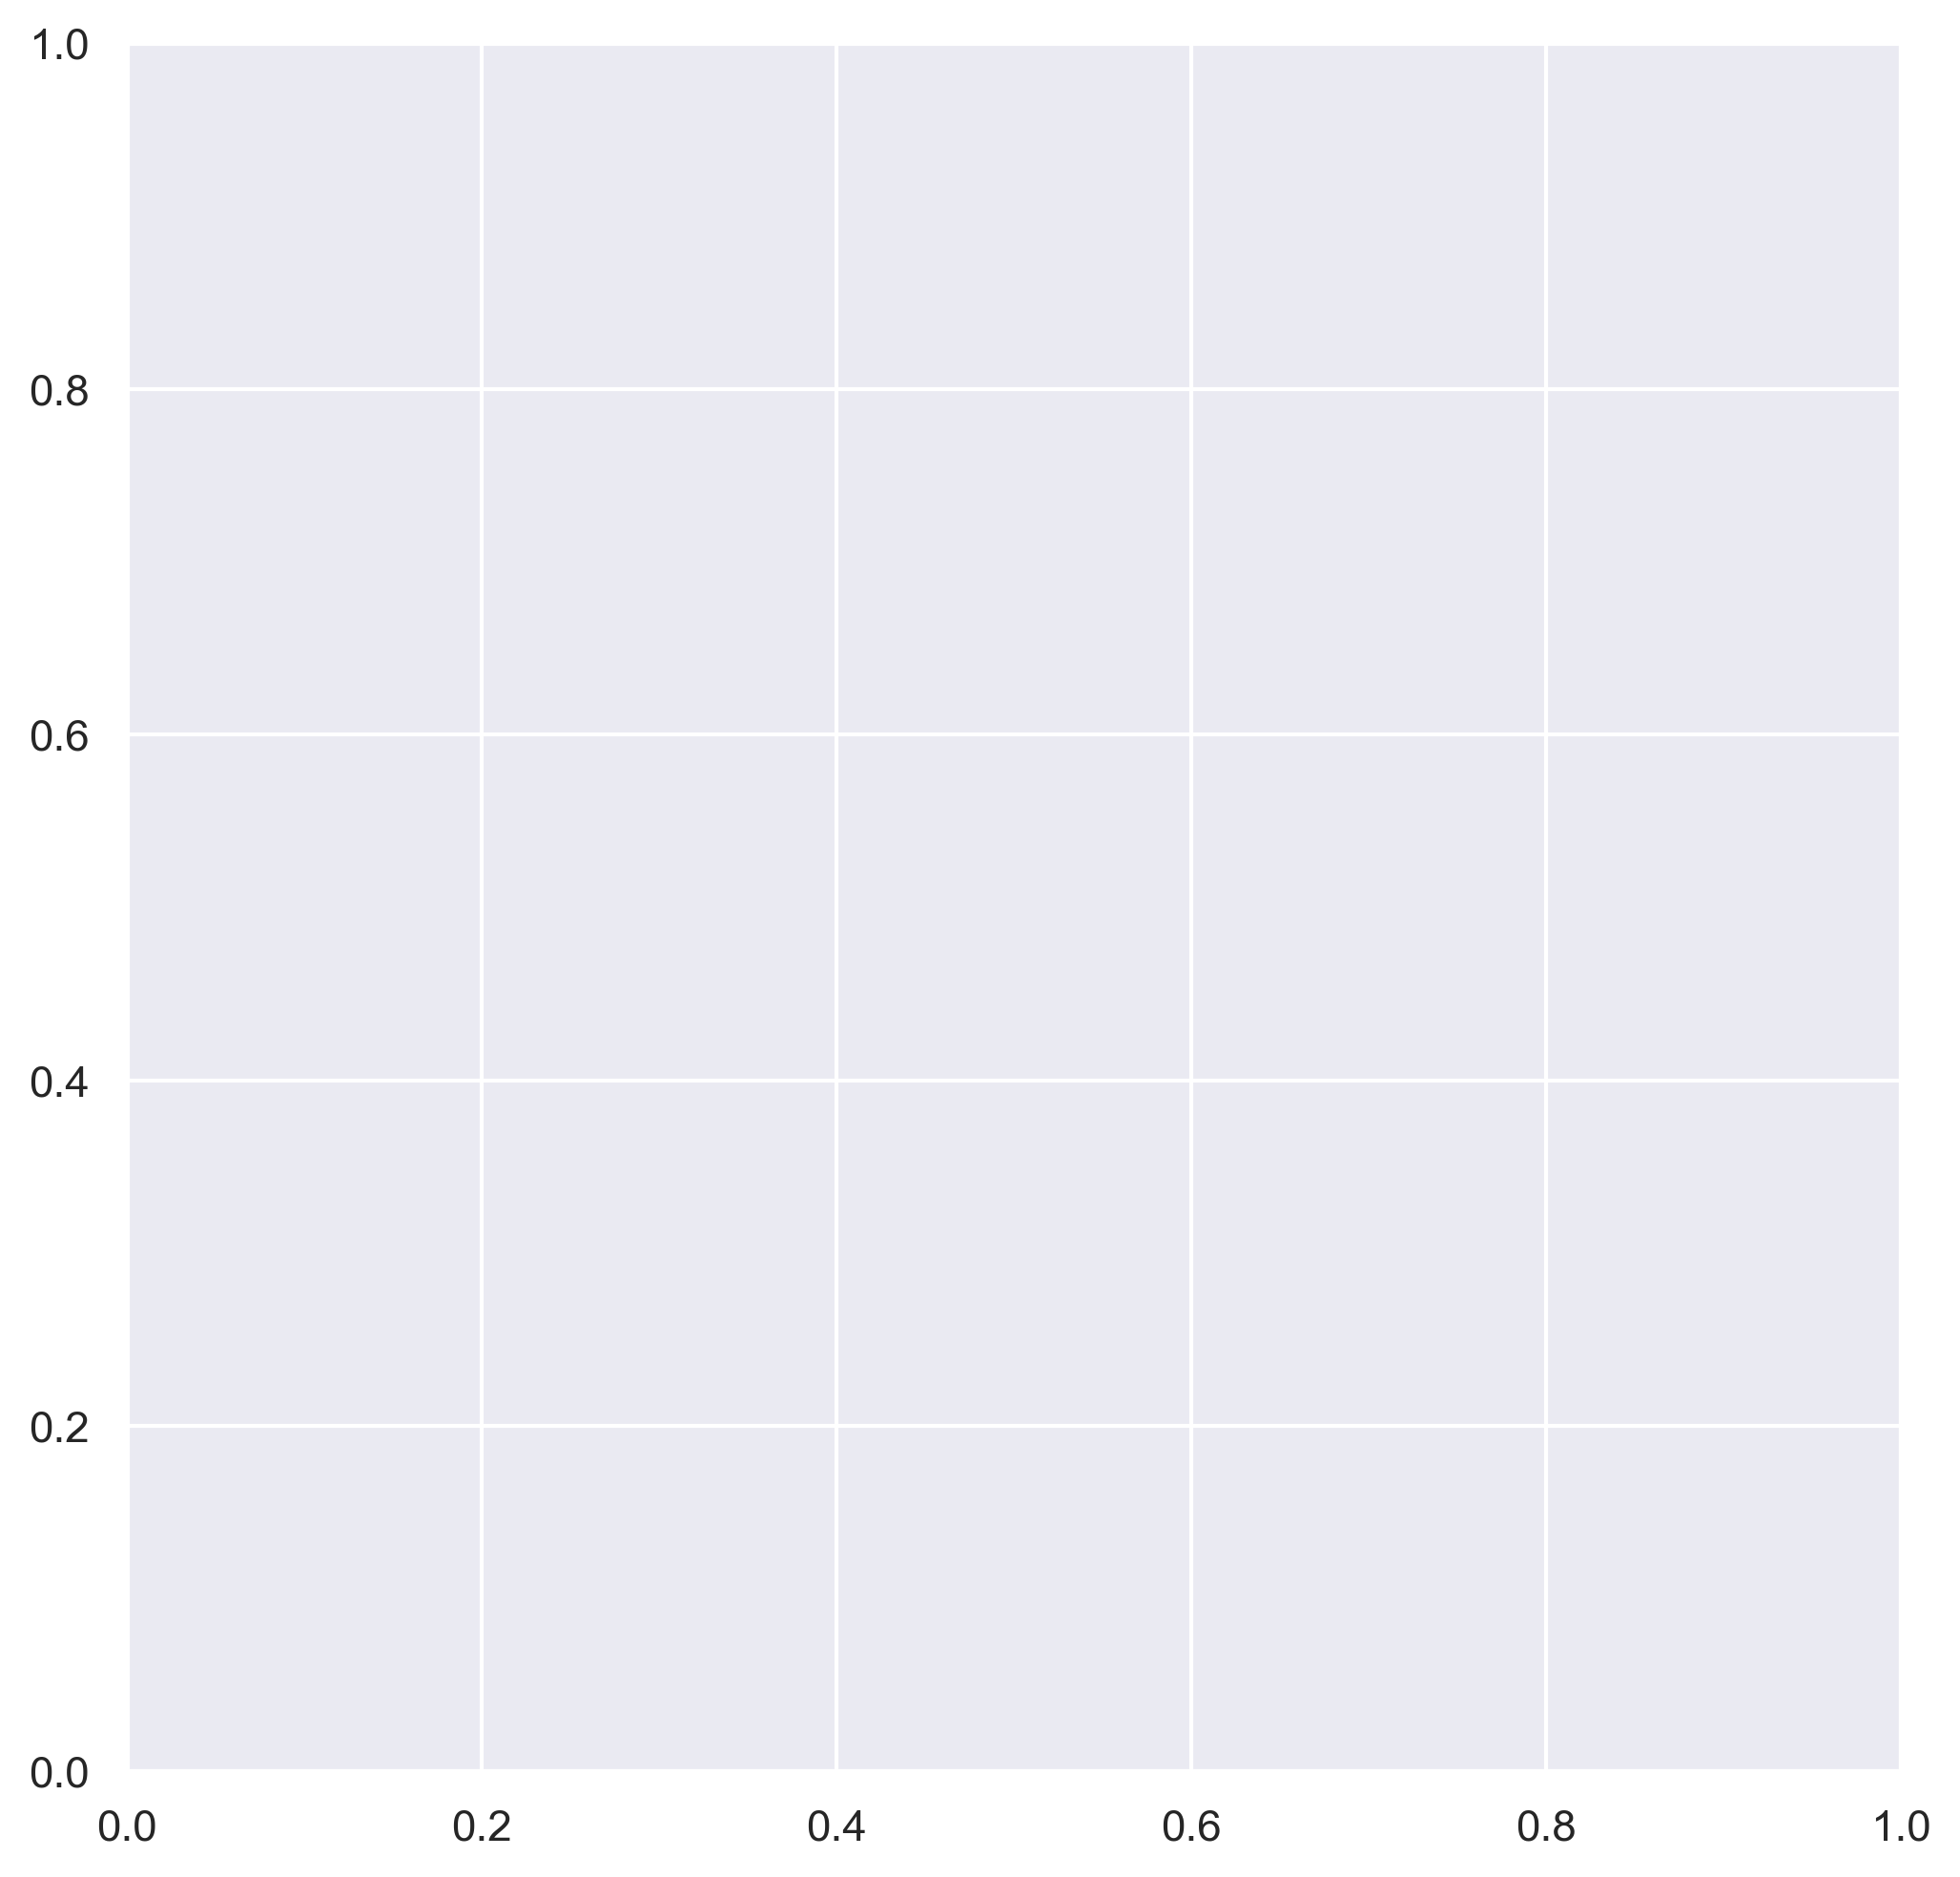

In [8]:
# scatter plot of planet mass vs planet periods with discovery method as hue 
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
sns.scatterplot(data=df, x='pl_orbper', y='pl_bmasse', hue='discoverymethod', ax=ax, s=5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Planet Mass (Earth Masses)')
ax.set_title('Bias of discovery methods')

Dominant discovery methods include transit, radial velocity and microlensing. But those methods are not equally biased towards different types of planets. From the scatterplot, we can see transit has bias 
- On planets with short periods and small semi-major axes because they transit their host star more frequently.
- On larger planets are more likely to be detected since they block more light.
- On planets whose orbital planes pass earth. Otherwise transit would not be observed.

Radial velocity has bias
- On massive planets that are close to host stars.
- On planets whose orbital plane close to the earth. The constraint on orbital plane is less strict than transit method.

Micro-lensing has bias 
- On massive planets bc massive planets have stronger lensing effect
- On planets distant from host stars (Complementary to transit and radial velocity methods)
- On planets with specific orbital period, orientation and eccentricity because lensing effect is strongest when the planet resides in the middle between background starlight and the earth

### Planet type 

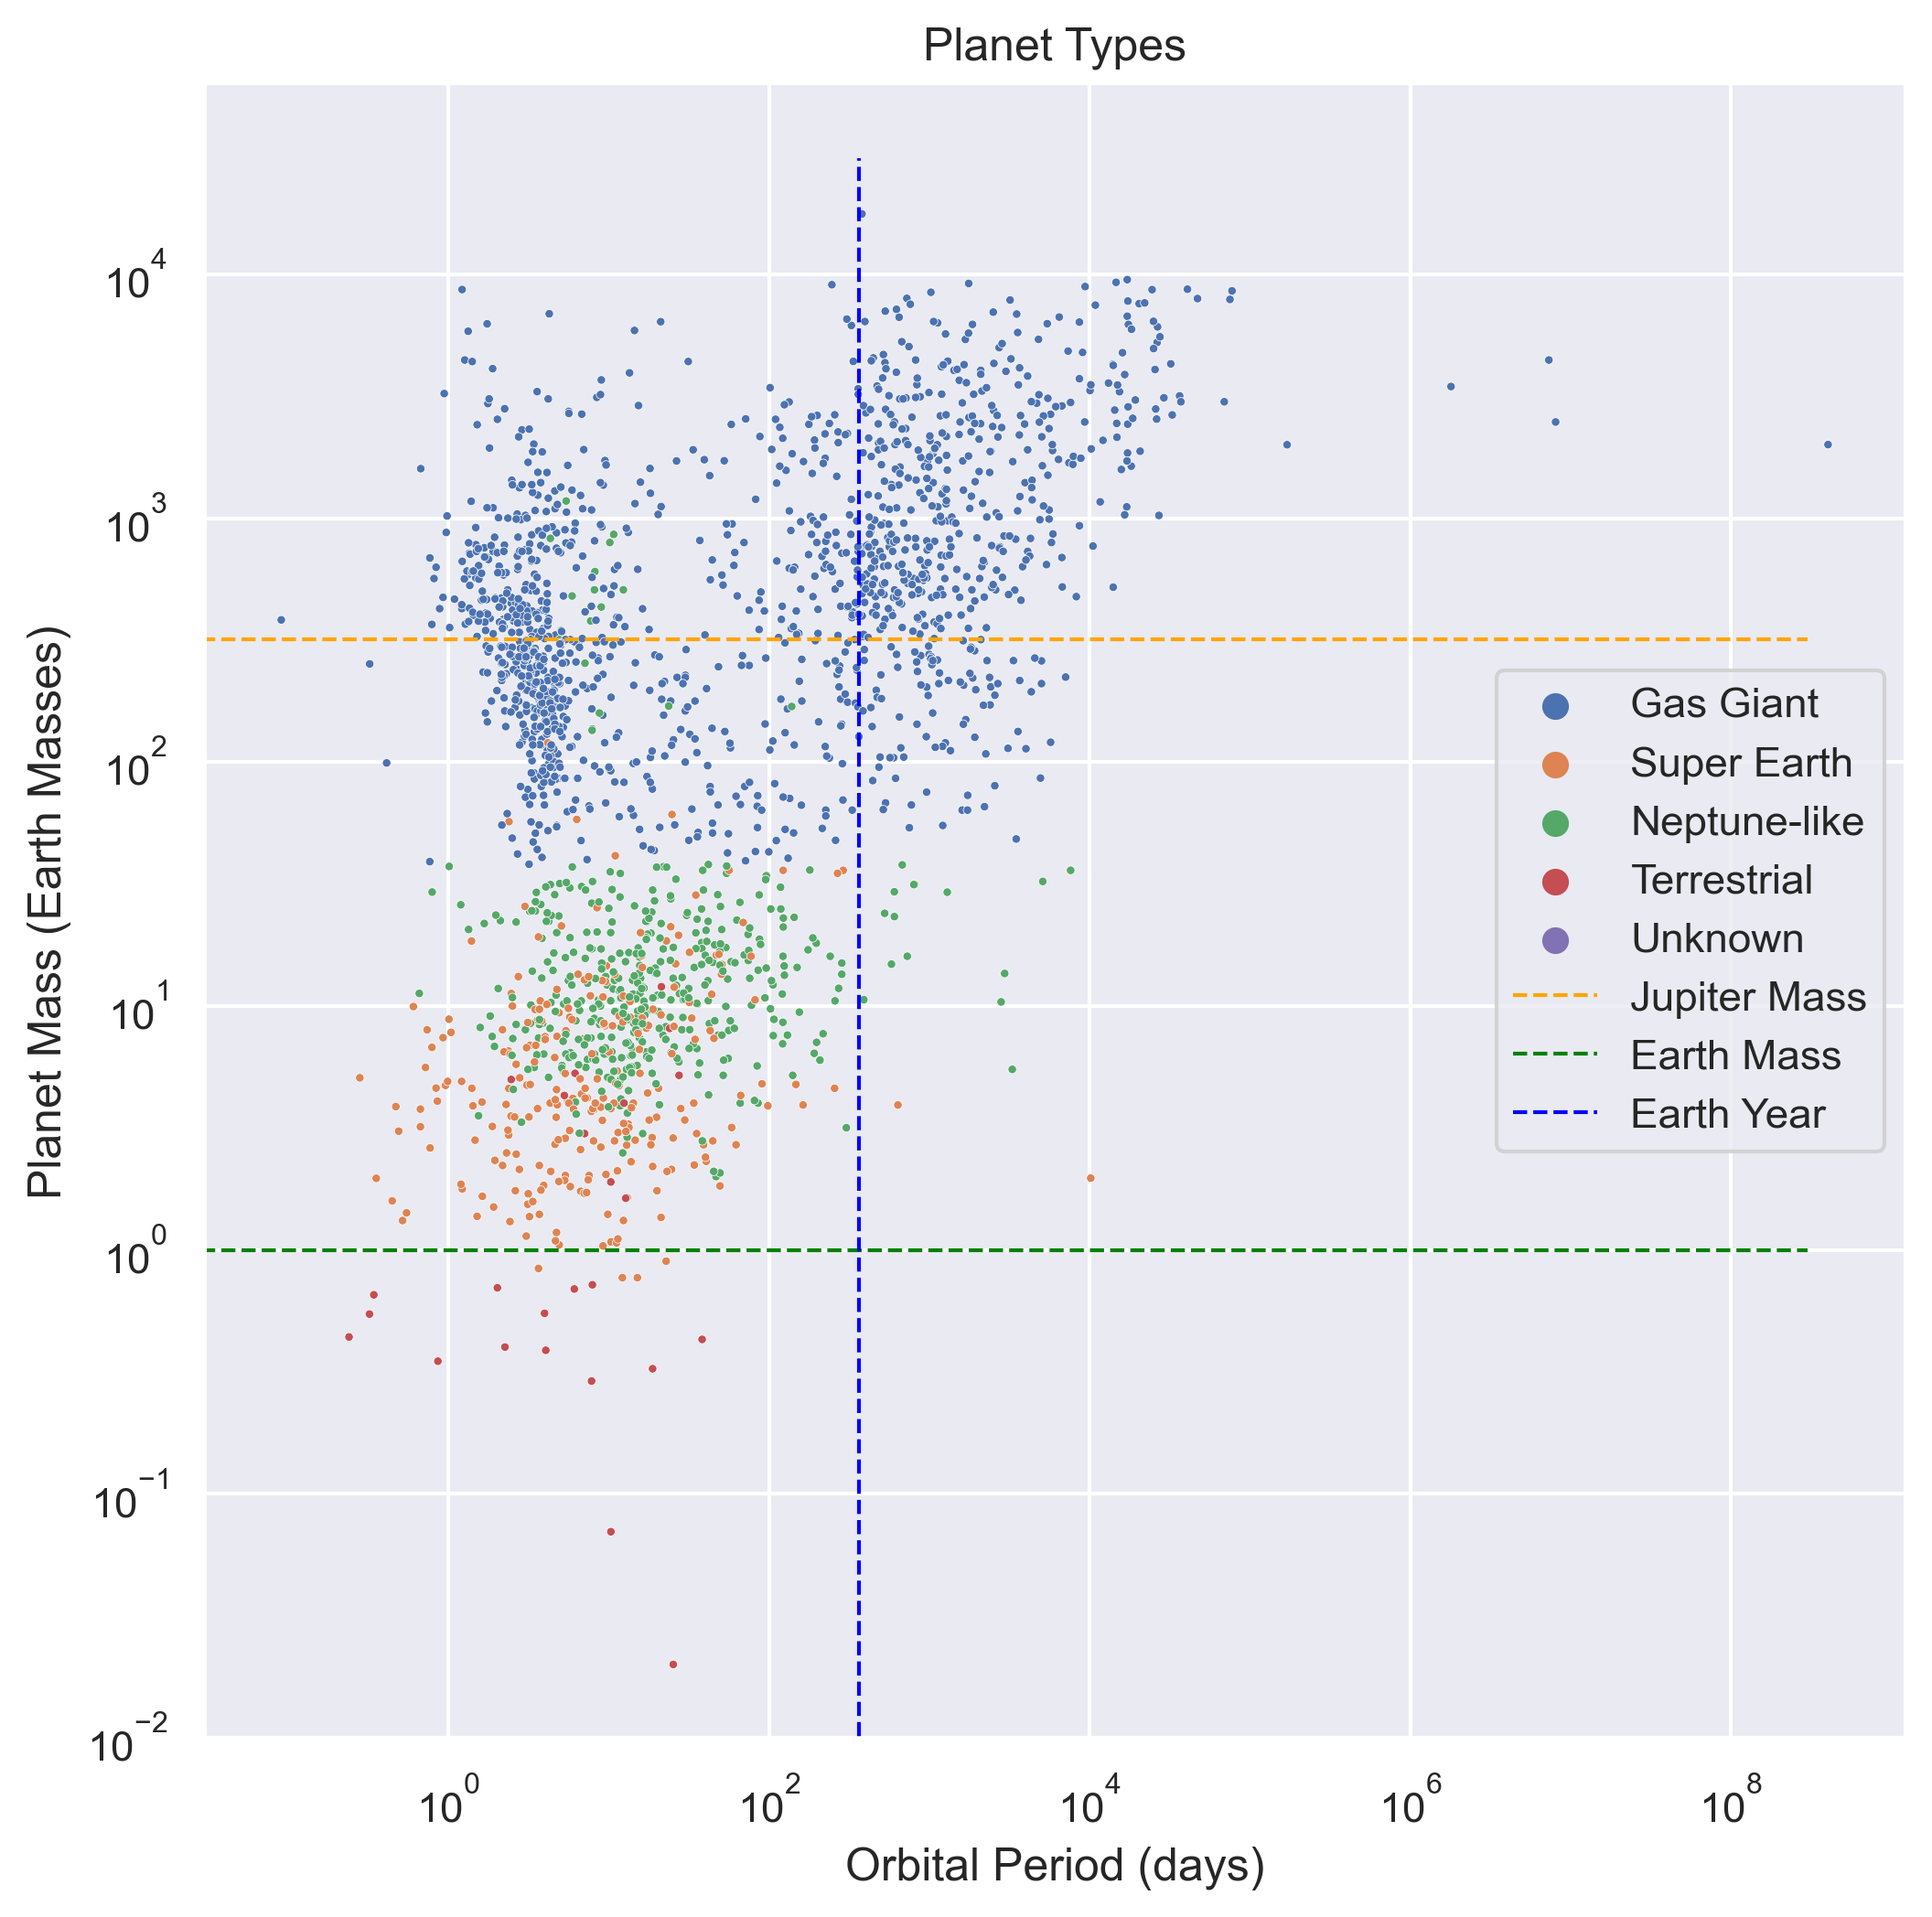

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
sns.scatterplot(data=df, x='pl_orbper', y='pl_bmasse', hue='planet_type', ax=ax, s=5)
ax.plot([0, 3e8], [318, 318], color='orange', linestyle='--', linewidth=1, label='Jupiter Mass')
ax.plot([0, 3e8], [1, 1], color='green', linestyle='--', linewidth=1, label='Earth Mass')
ax.plot([365.25, 365.25], [0, 3e4], color='blue', linestyle='--', linewidth=1, label='Earth Year')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Planet Mass (Earth Masses)')
ax.set_title('Planet Types')
ax.legend()

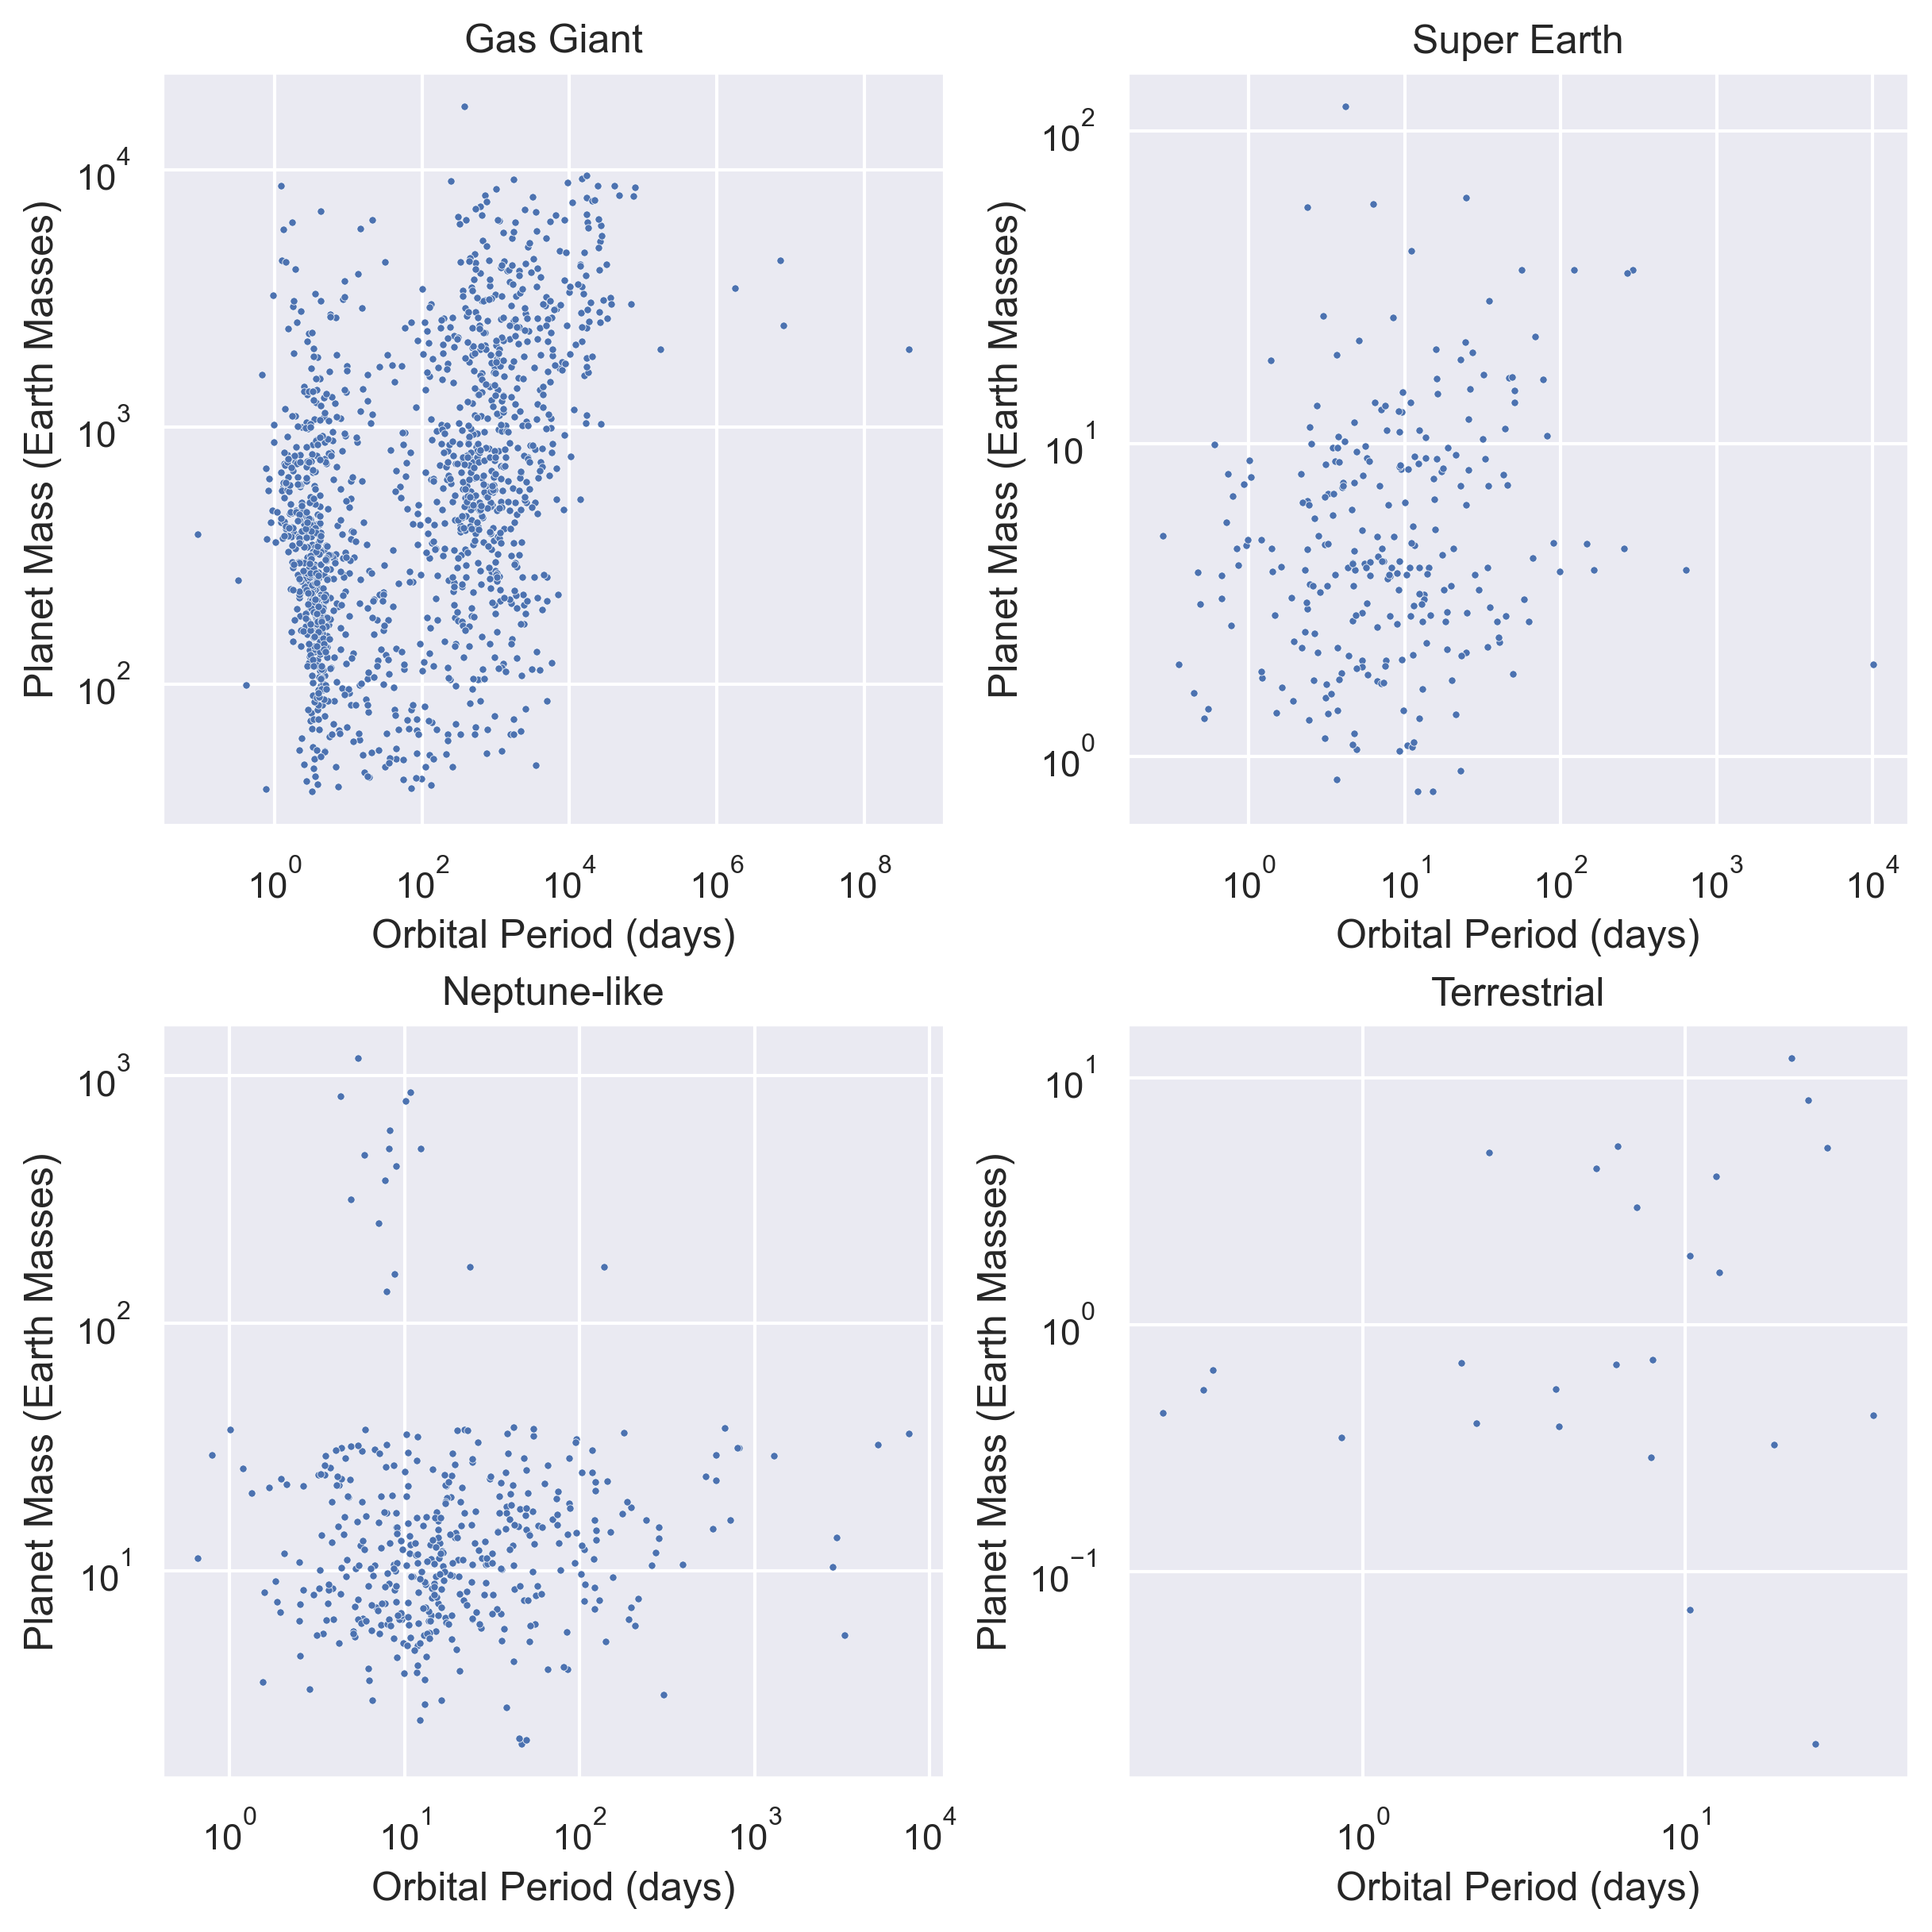

In [ ]:
# plot only neptune like planets
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300)
types = ['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial']
for i in range(2):
    for j in range(2):
        type = types[i*2+j]
        sns.scatterplot(data=df[df['planet_type'] == type], x='pl_orbper', y='pl_bmasse', ax=axes[i,j], s=5)
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('Orbital Period (days)')
        axes[i,j].set_ylabel('Planet Mass (Earth Masses)')
        axes[i,j].set_title(type)

fig.set_constrained_layout(True)

There are several counter-intuitive findings from the scatterplot:
- Hot Jupiters are common. 
- Earth-like planets are much rarer than super-earths.  
- Most planets have less period than earth-year. 

The above findings are contradictory to our solar system. This could be result of the bias of discovery methods or the fact that Hot Jupiters are common and Earth-like planets are indeed rare in the universe.

Split gas-giants into two clusters

In [ ]:
## split gas giants into two classes 
from sklearn.cluster import AgglomerativeClustering,DBSCAN
# given y predict distribution of x 
# leading components of each label in PCA

df_gas = df[df['planet_type'] == 'Gas Giant'].dropna(subset=['pl_orbper', 'pl_bmasse'])
X = np.log10(df_gas[['pl_orbper', 'pl_bmasse']].values)

clusters = AgglomerativeClustering().fit(X)

In [ ]:
df_gas['planet_type'] = list(map(lambda x: 'Jupiter-like' if x == 0 else 'Hot Jupiter', clusters.labels_))

Text(0.5, 1.0, 'Jupiter-like and Hot Jupiters')

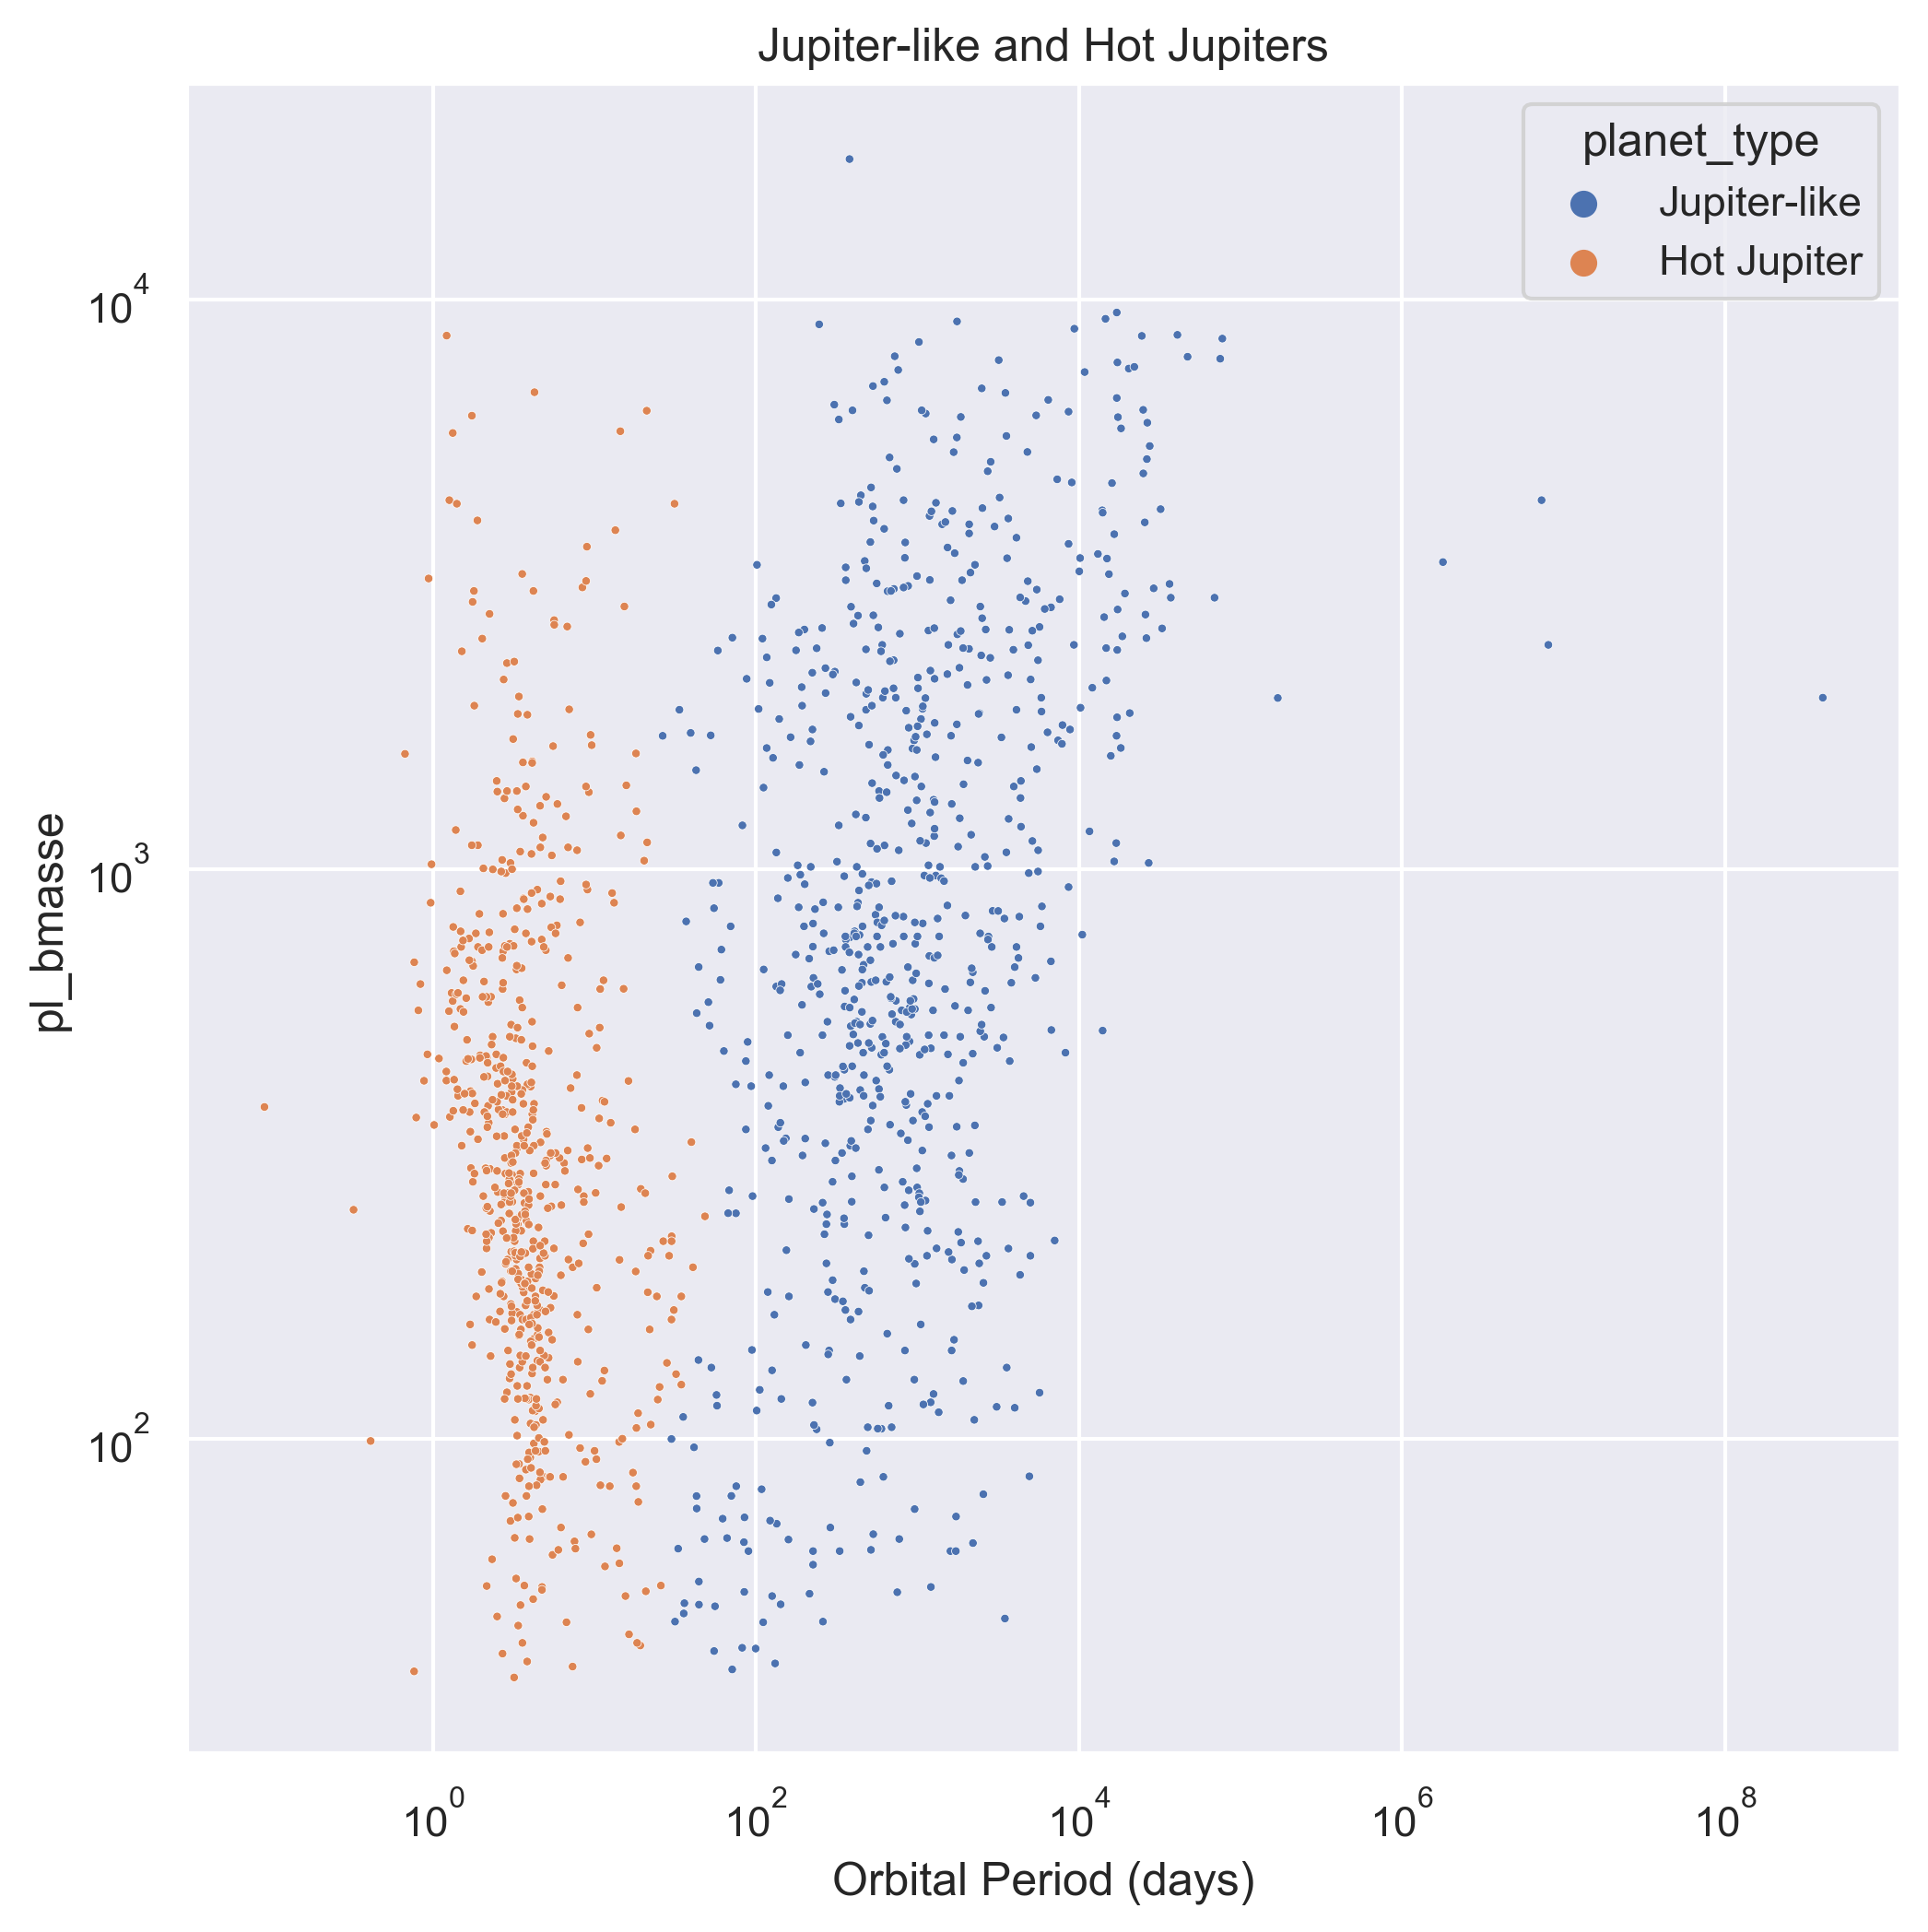

In [ ]:
# plot clusters
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
sns.scatterplot(data=df_gas, x='pl_orbper', y='pl_bmasse', hue='planet_type', ax=ax, s=5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)')
ax.set_title('Jupiter-like and Hot Jupiters')


### Contingency test on planet type
#### Stellar mass

Text(0.5, 1.0, 'Mass Distribution of Host Stars')

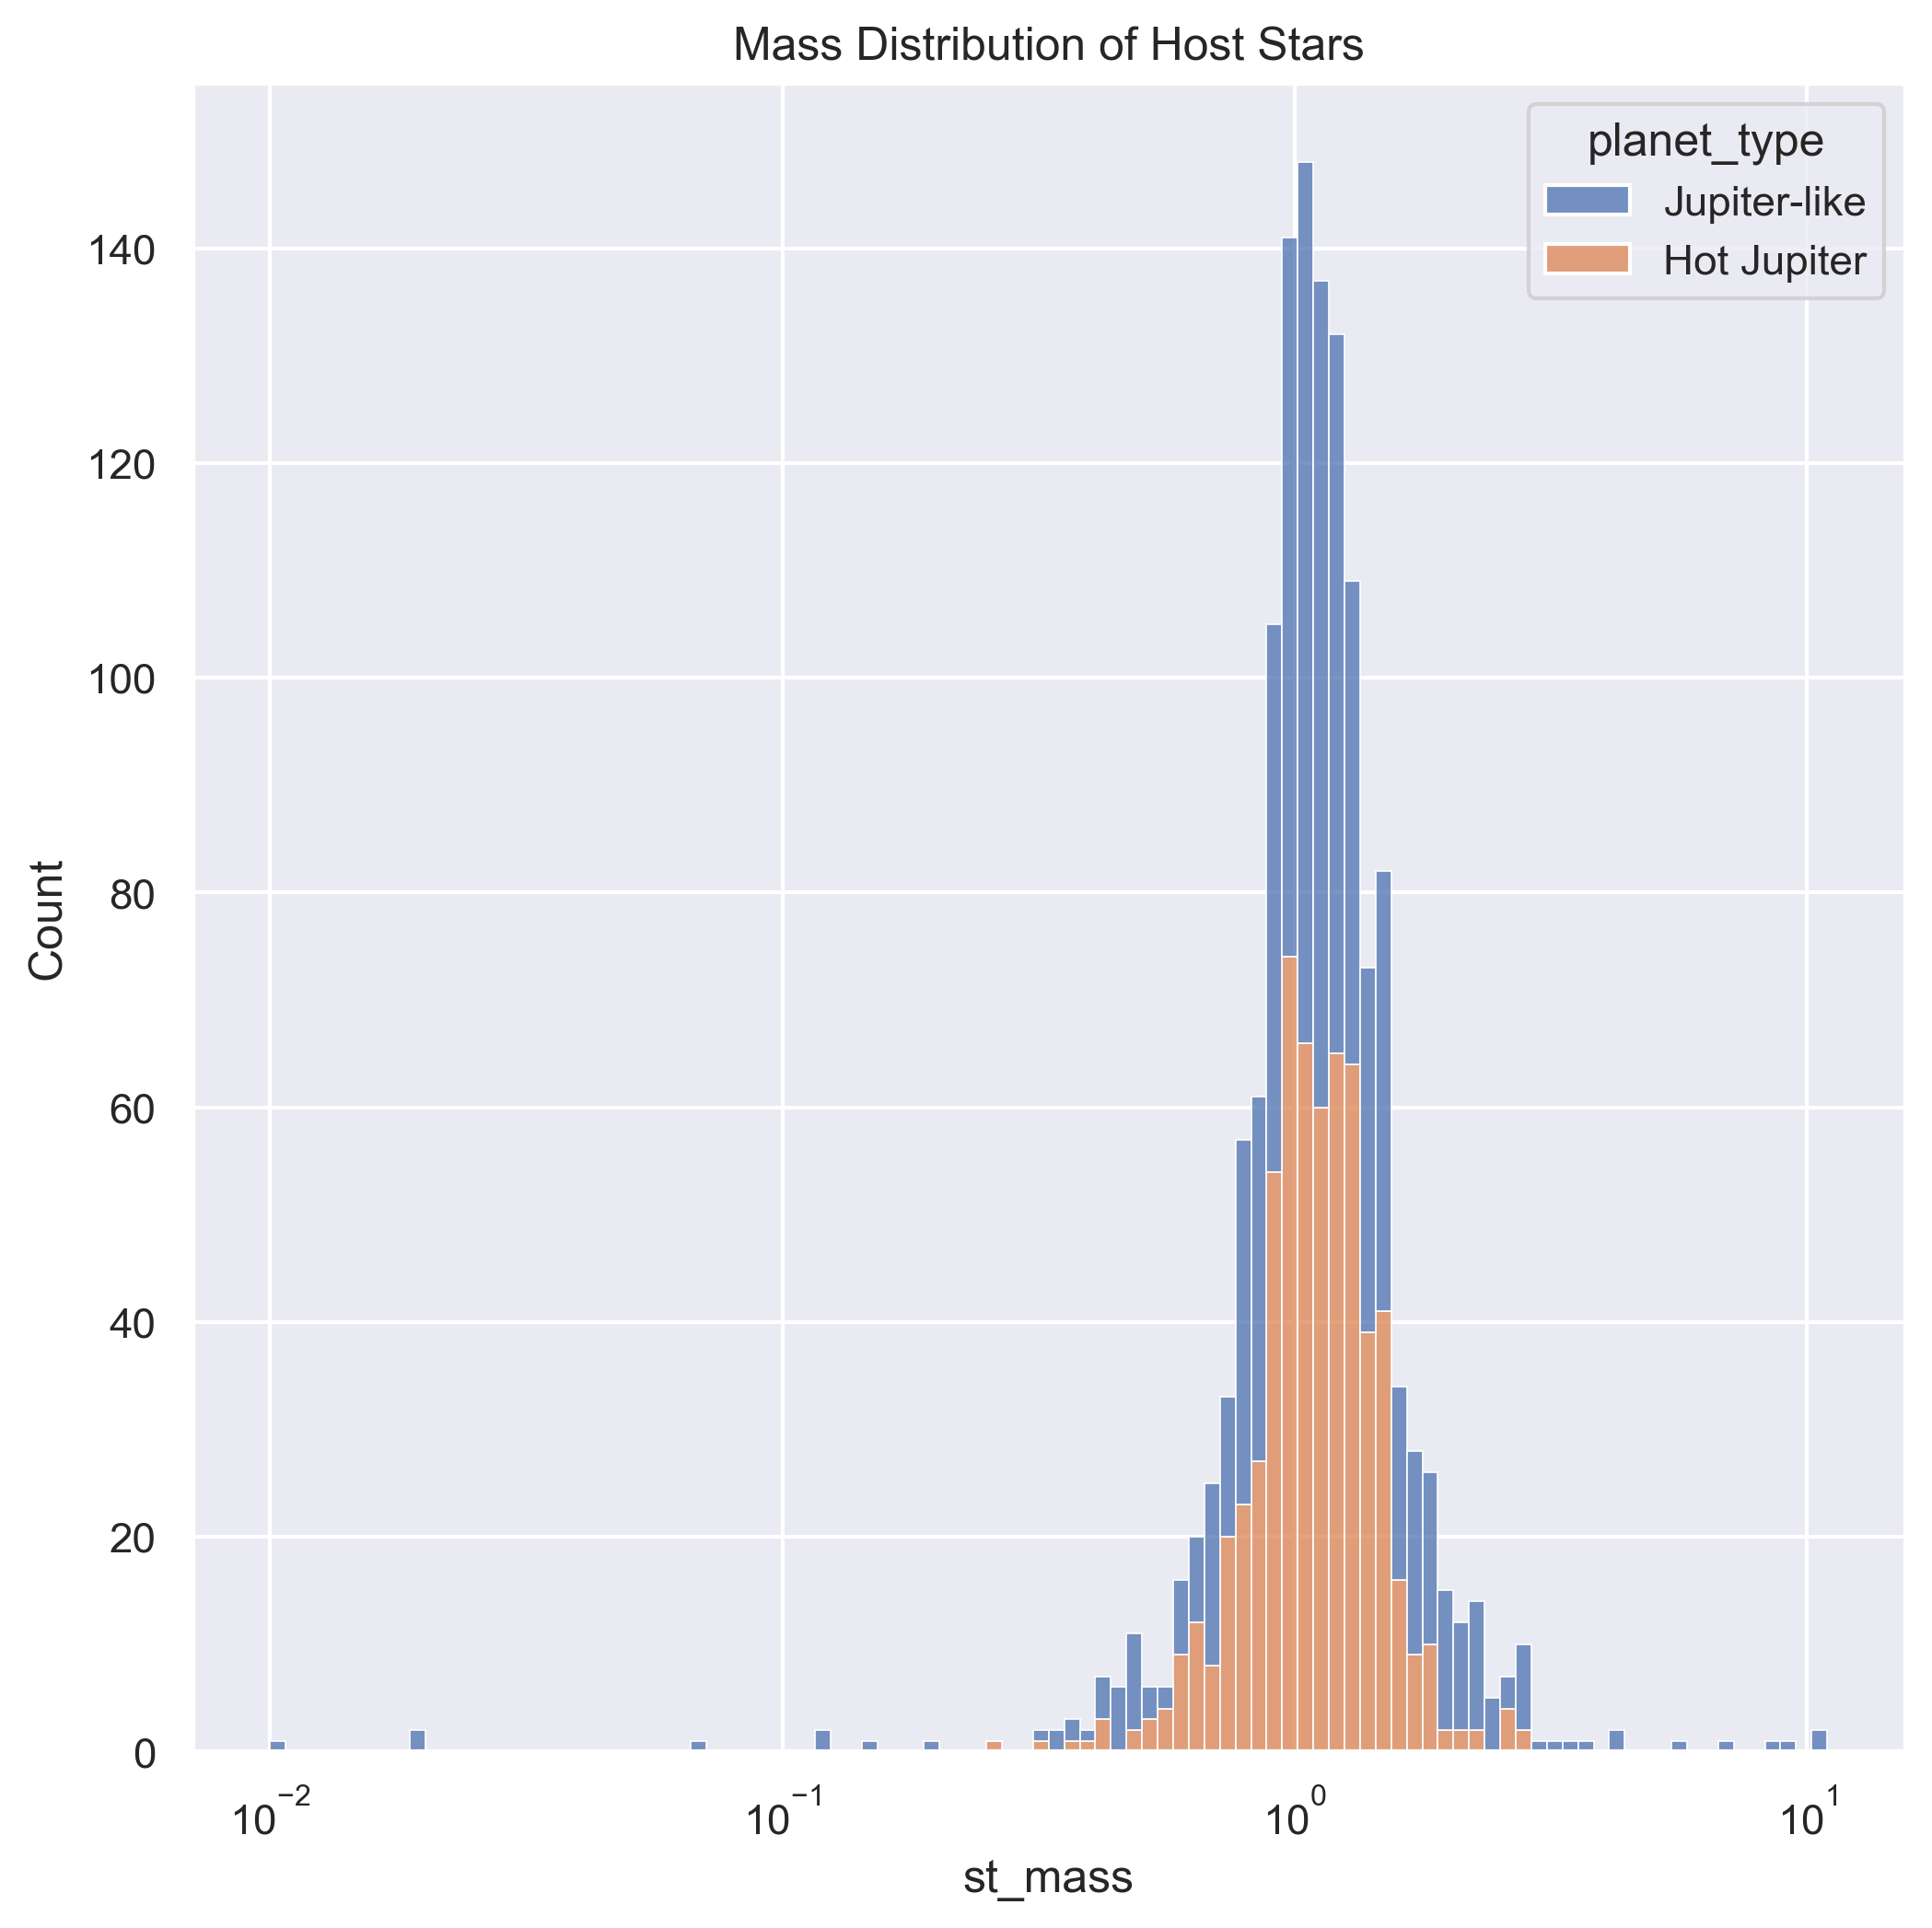

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)

sns.histplot(data=df_gas, x='st_mass', hue='planet_type', multiple='stack', bins=100, log_scale=(True, False), ax=ax)
ax.set_title('Mass Distribution of Host Stars')

In [ ]:
import scipy.stats as stats
# compute spearman correlation coefficient
corr, p = stats.spearmanr(df_gas['planet_type'], df_gas['st_mass'])

In [ ]:
print(corr)
print(p)

0.038357107314633036
0.1559114161349007


#### Number of planets

No correlation between `planet type` and `stellar mass`

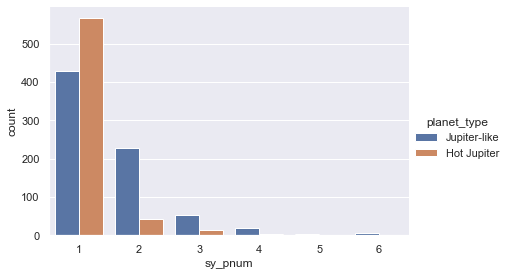

In [ ]:
sns.catplot(data=df_gas, x='sy_pnum', hue='planet_type', kind='count', height=4, aspect=1.5)

In [ ]:
stats.spearmanr(df_gas['planet_type'], df_gas['sy_pnum'])

SpearmanrResult(correlation=0.35582391475233976, pvalue=3.686530203737315e-42)

Correlation between `planet type` and `number of planets`. In systems where hot Jupiters are found, there tends ot be less planets. It may serve as evidence to migration theory that Gas giants are formed far away from the host star and migrate inwards due to some reasons while other inner planets are absorbed by the host star. 

#### Number of host stars

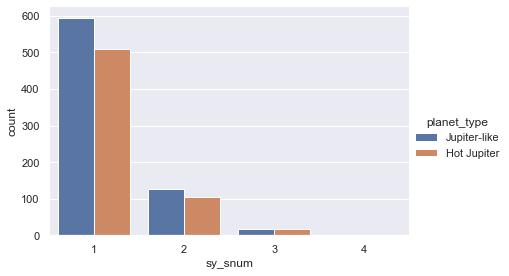

In [ ]:
sns.catplot(data=df_gas, x='sy_snum', hue='planet_type', kind='count', height=4, aspect=1.5)

In [ ]:
stats.spearmanr(df_gas['planet_type'], df_gas['sy_snum'])

SpearmanrResult(correlation=0.004539420925388547, pvalue=0.8666875938854455)

No correlation between `planet type` and `number of host stars`

#### Spectral type

In [ ]:
df_gas['st_spectype'].unique()
# combine spectype into 6 categories based on the first letter of spectral type
df_gas['stellar_spectrum'] = list(map(lambda x: x[0] if isinstance(x, str) else np.nan, df_gas['st_spectype']))

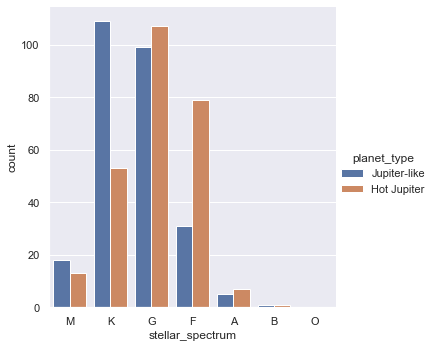

In [ ]:
# Define the order of the x-axis categories
order = ['O', 'B', 'A', 'F', 'G', 'K', 'M'][::-1]

# Create the catplot and specify the order of the x-axis categories
sns.catplot(data=df_gas, x='stellar_spectrum', hue='planet_type', kind='count', order=order)

In [ ]:
df_temp = df_gas.dropna(subset=['stellar_spectrum'])

# Calculate the Spearman correlation using the sorted_stellar_spectrum
result = stats.spearmanr(df_temp['planet_type'], df_temp['stellar_spectrum'].map(lambda x: order.index(x) if x in order else np.nan))
print(result)


SpearmanrResult(correlation=-0.20608799511931714, pvalue=1.9603691115867505e-06)


Hot Jupiters tend to be found near hotter stars

#### Stellar metallicity

/Users/wang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/wang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Metallicity Distribution of Host Stars')

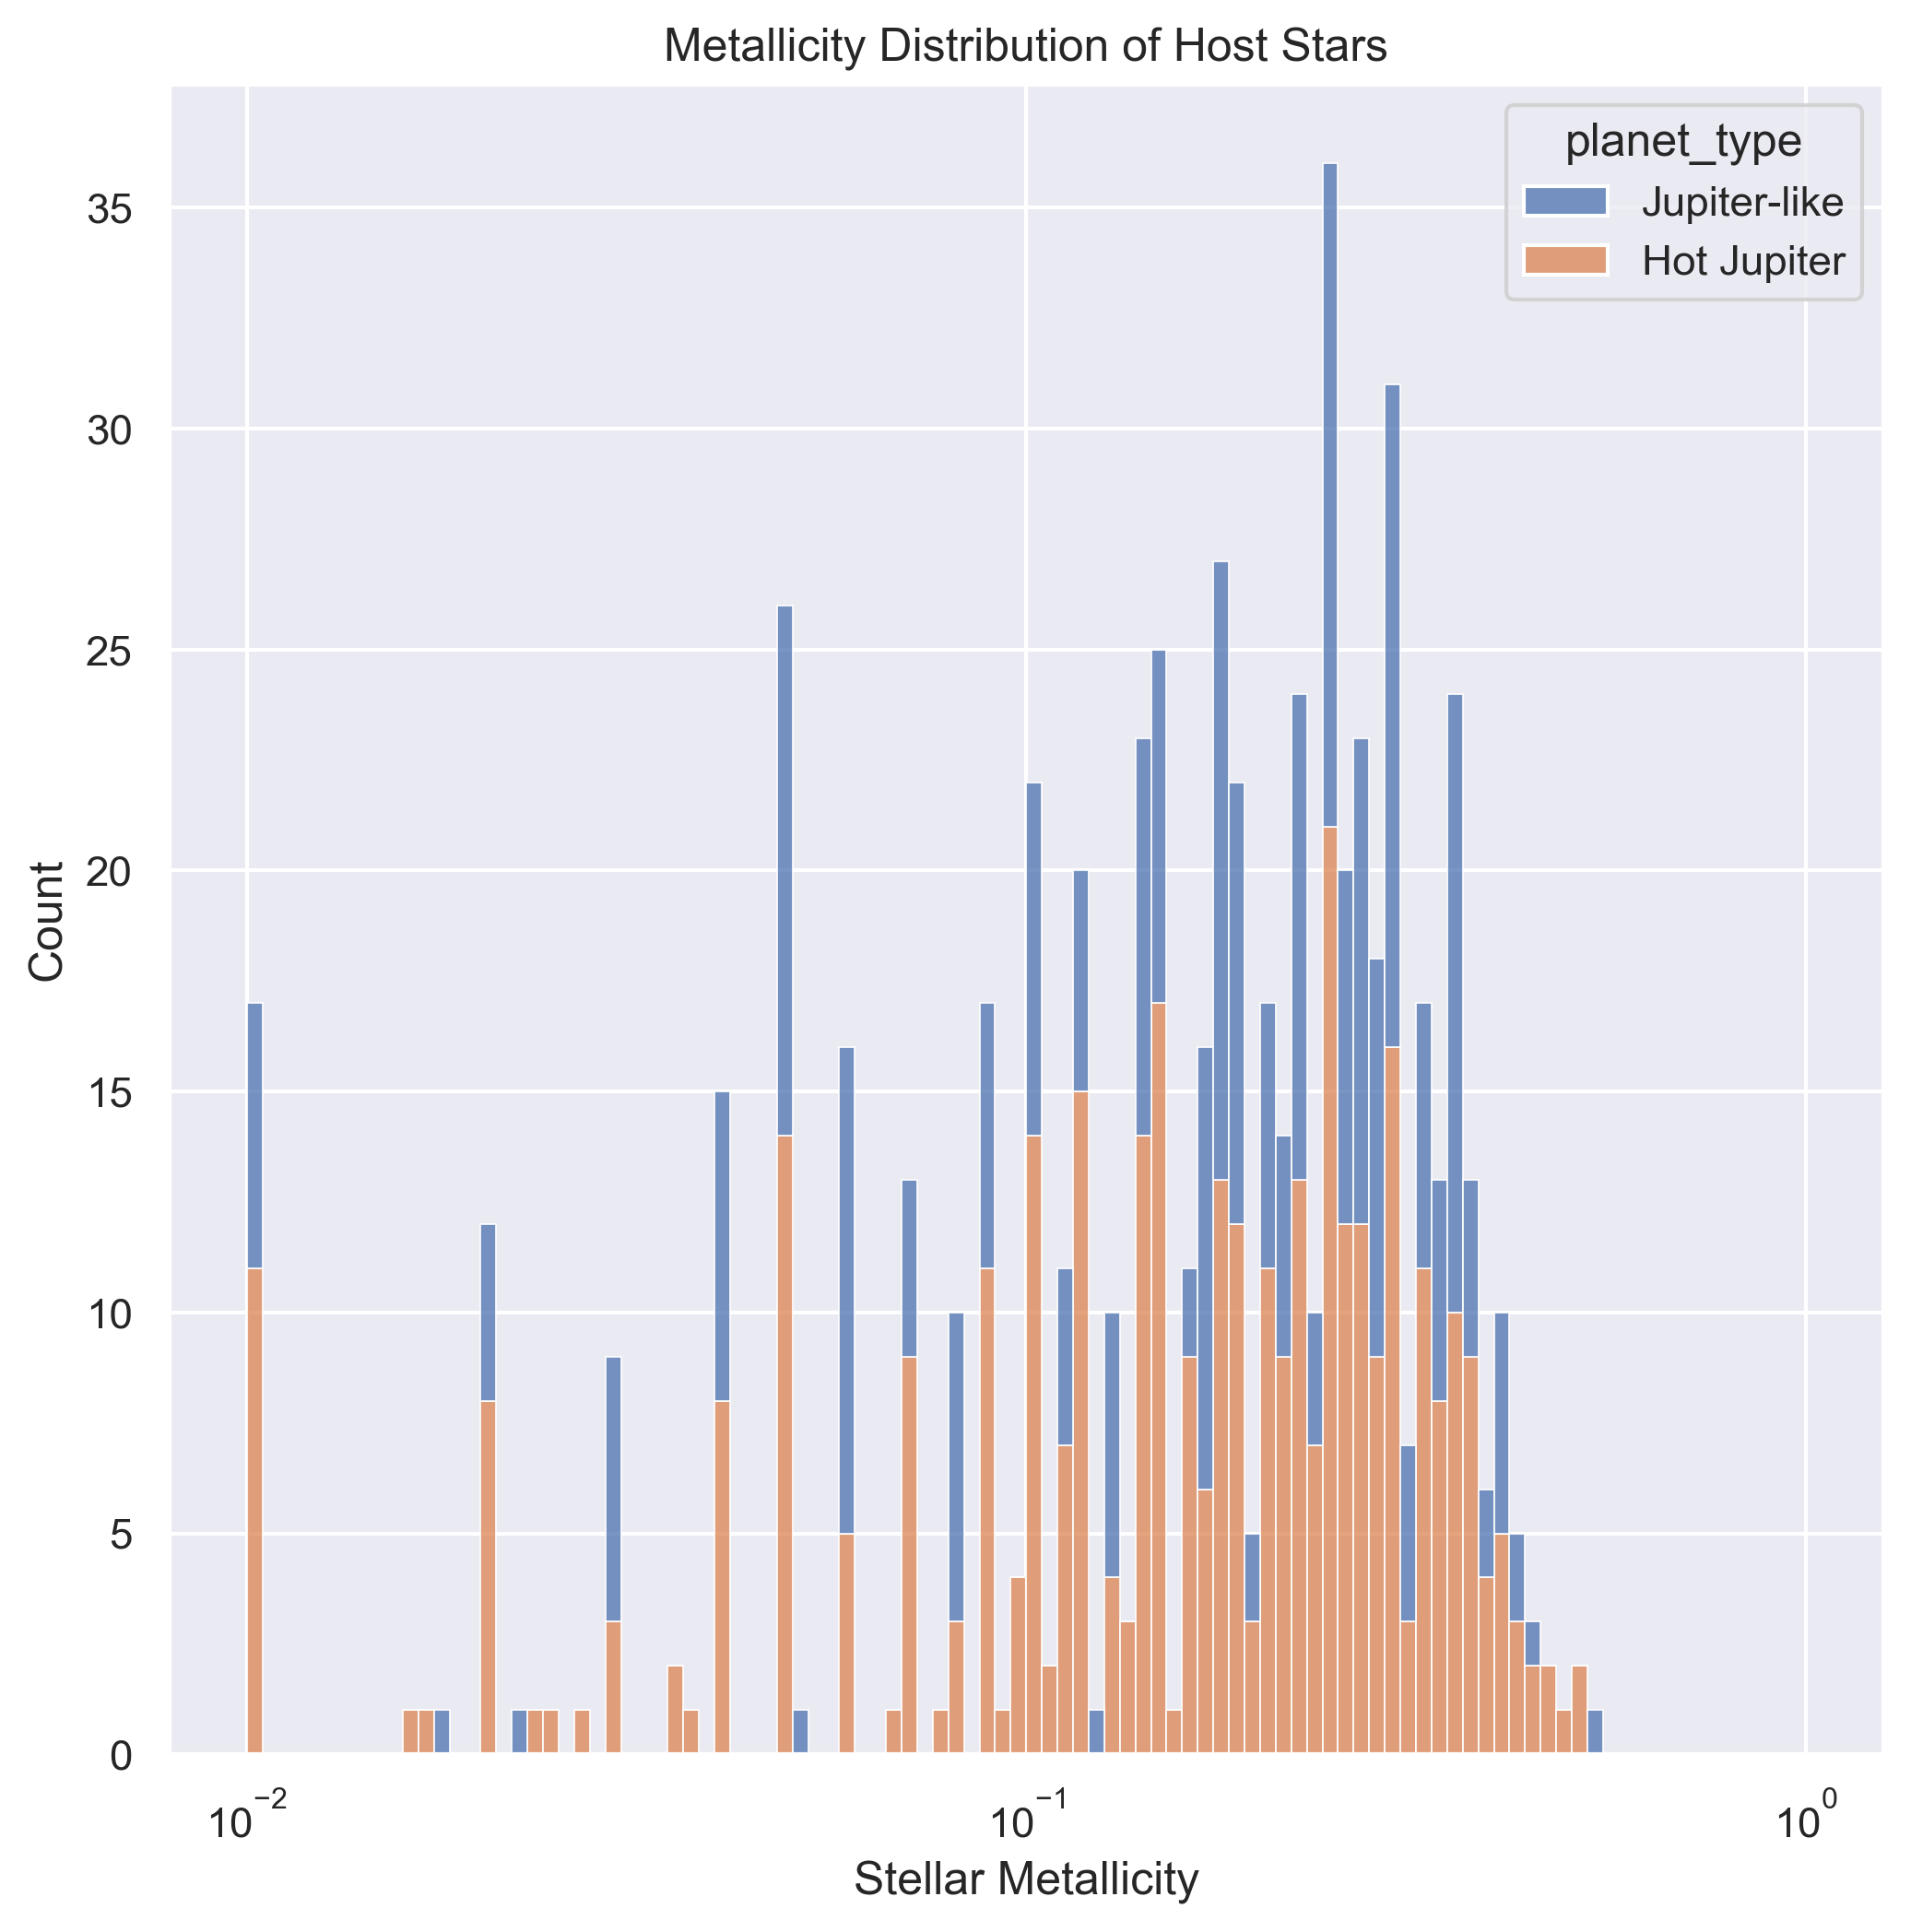

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)

sns.histplot(data=df_gas, x='st_met', hue='planet_type', multiple='stack', bins=100, log_scale=(True, False), ax=ax, binrange=(-2, 0))
ax.set_xlabel('Stellar Metallicity')
ax.set_title('Metallicity Distribution of Host Stars')

In [ ]:
# map planet type to 0 and 1
df_temp = df_gas.dropna(subset=['st_met'], inplace=False)
stats.pointbiserialr(list(map(lambda x: 0 if x == 'Jupiter-like' else 1, df_temp['planet_type'])), df_temp['st_met'])

PointbiserialrResult(correlation=0.163733627941997, pvalue=1.5814167881215577e-07)

Some evidence indicate that hot Jupiters are more likely to be found in low-metallicity stellar systems. Namely, younger stellar systems tend to have more hot Jupiters. 

#### Stellar surface gravity

Text(0.5, 1.0, 'Stellar Surface Gravity Distribution')

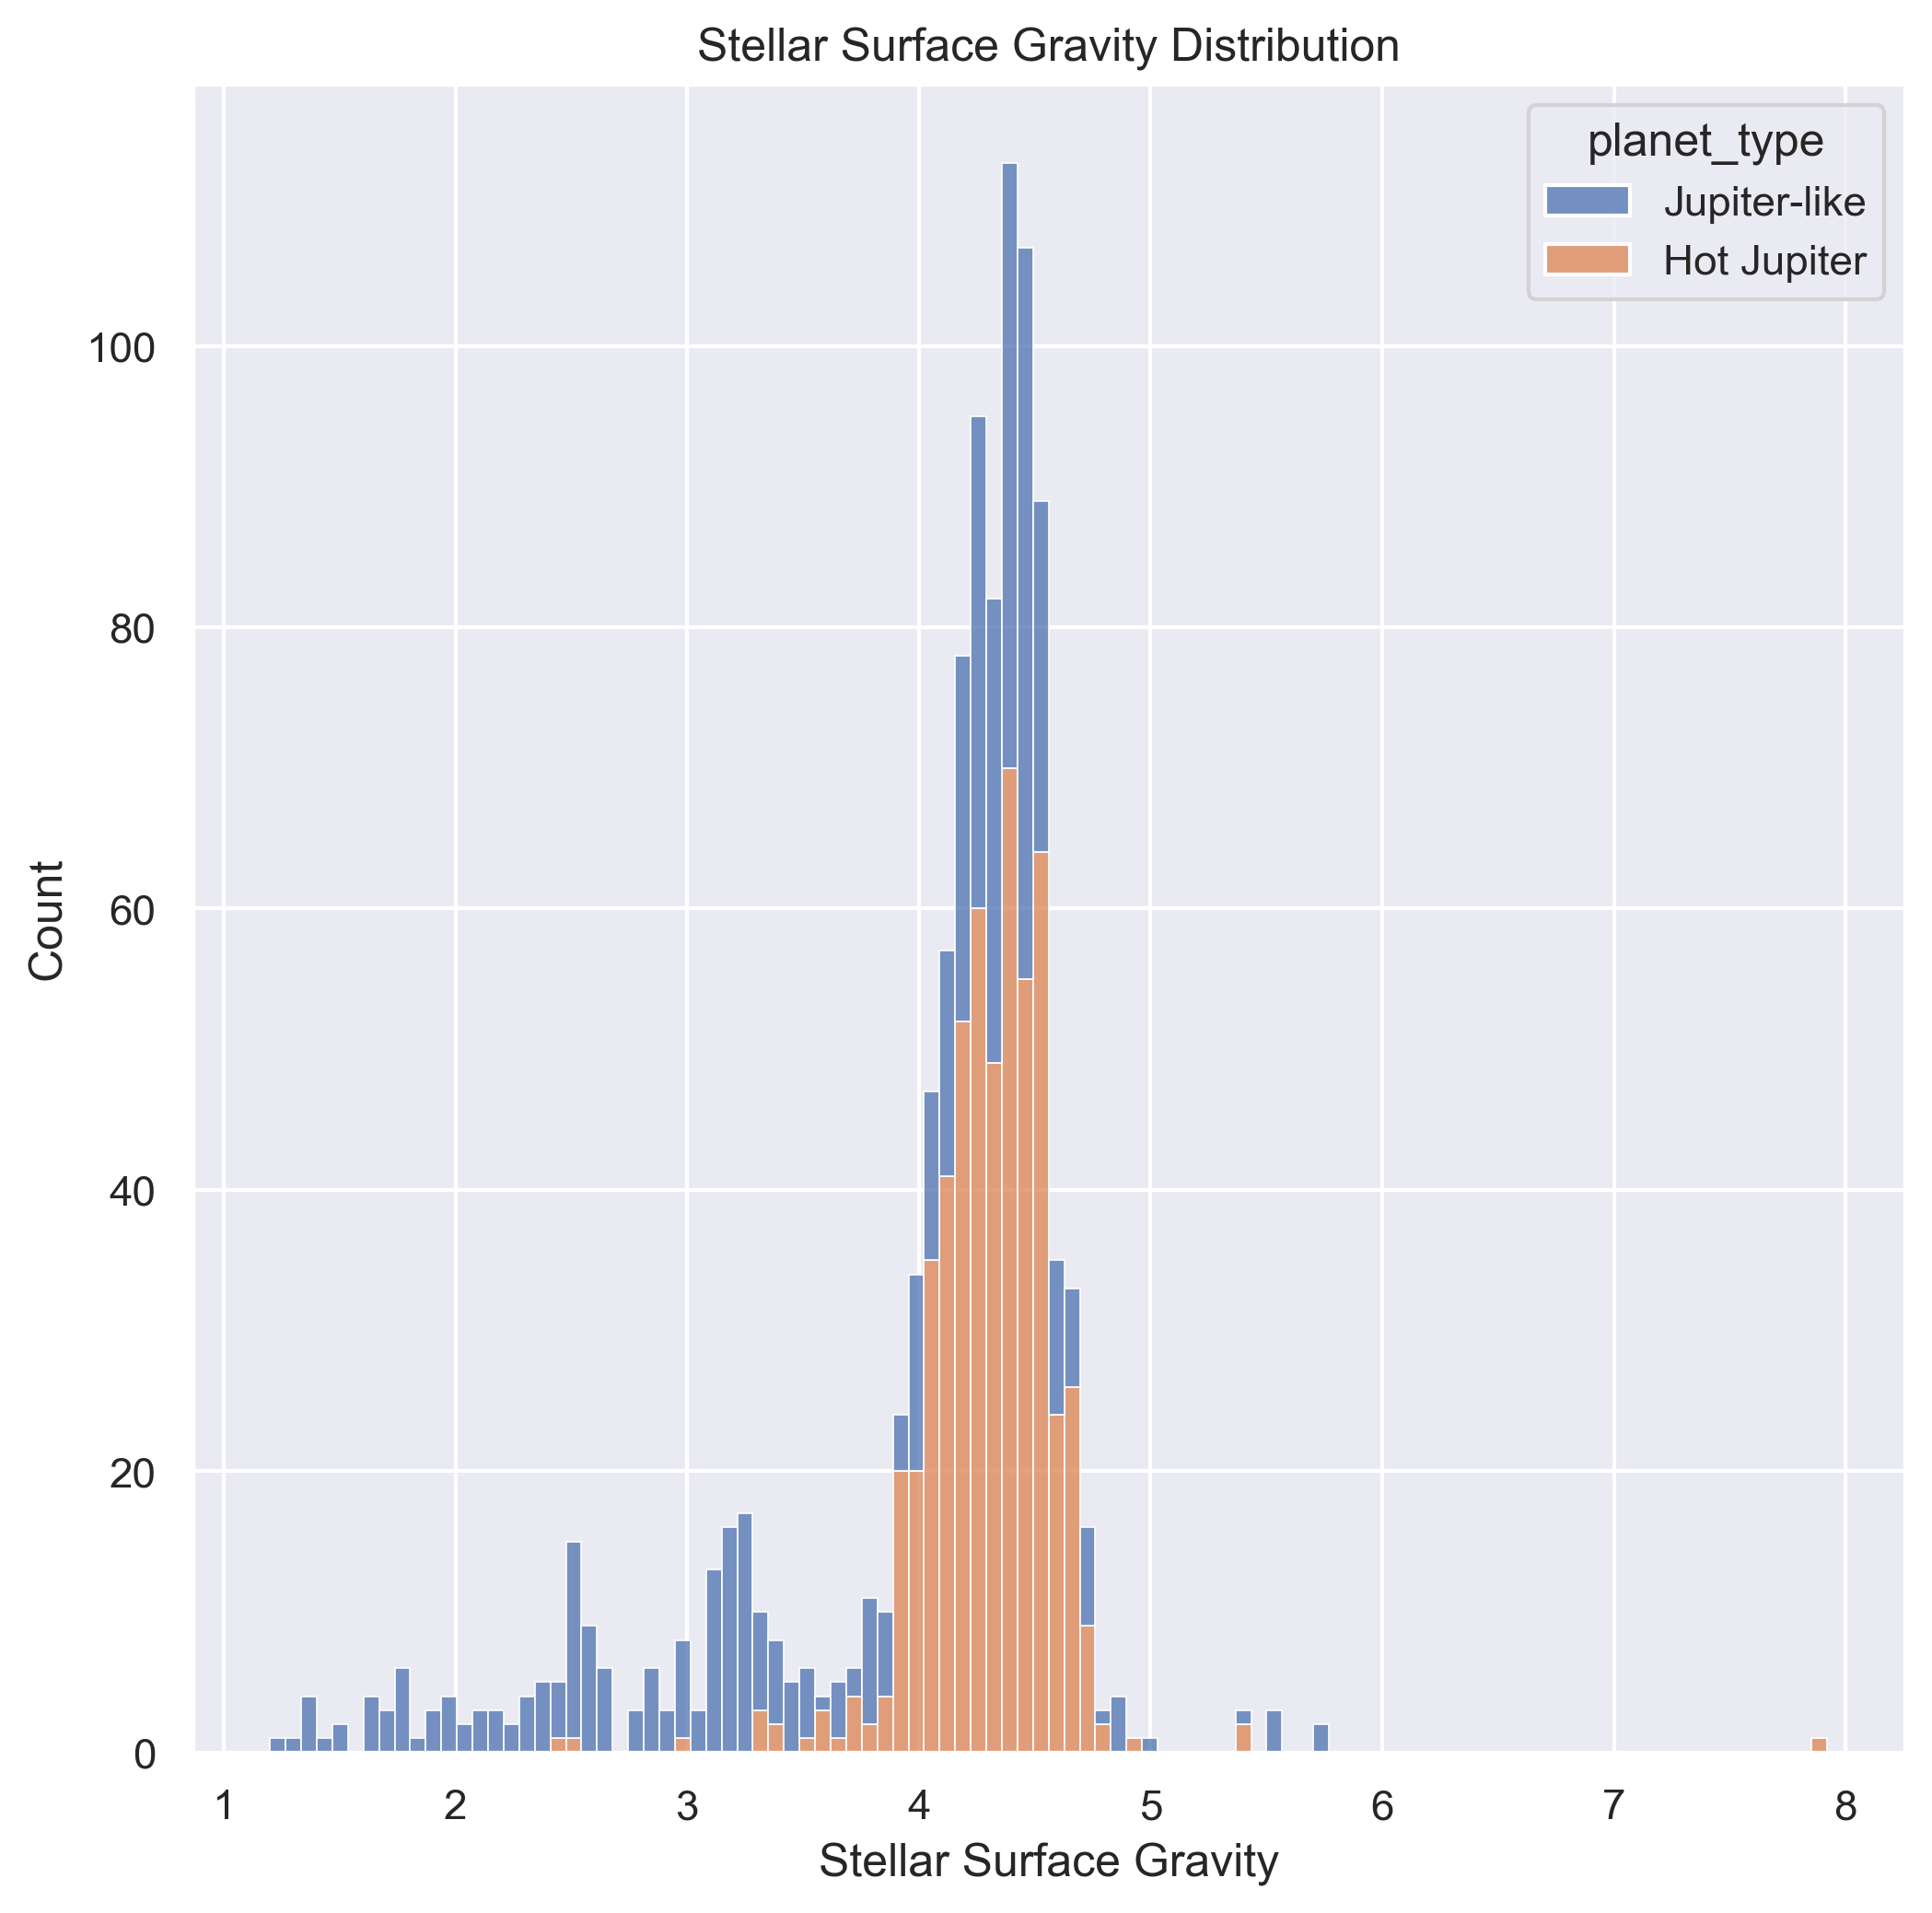

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)

sns.histplot(data=df_gas, x='st_logg', hue='planet_type', multiple='stack', bins=100, ax=ax)
ax.set_xlabel('Stellar Surface Gravity')
ax.set_title('Stellar Surface Gravity Distribution')

In [ ]:
df_temp = df_gas.dropna(subset=['st_logg'], inplace=False)

stats.pointbiserialr(list(map(lambda x: 0 if x == 'Jupiter-like' else 1, df_temp['planet_type'])), df_temp['st_logg'])

PointbiserialrResult(correlation=0.3858706030317162, pvalue=1.7972291985493878e-38)

Evidence that hot Jupiters tend to appear around star with higher surface gravity. 

#### Orbital eccentricity

Text(0.5, 1.0, 'Orbital eccentricity distribution')

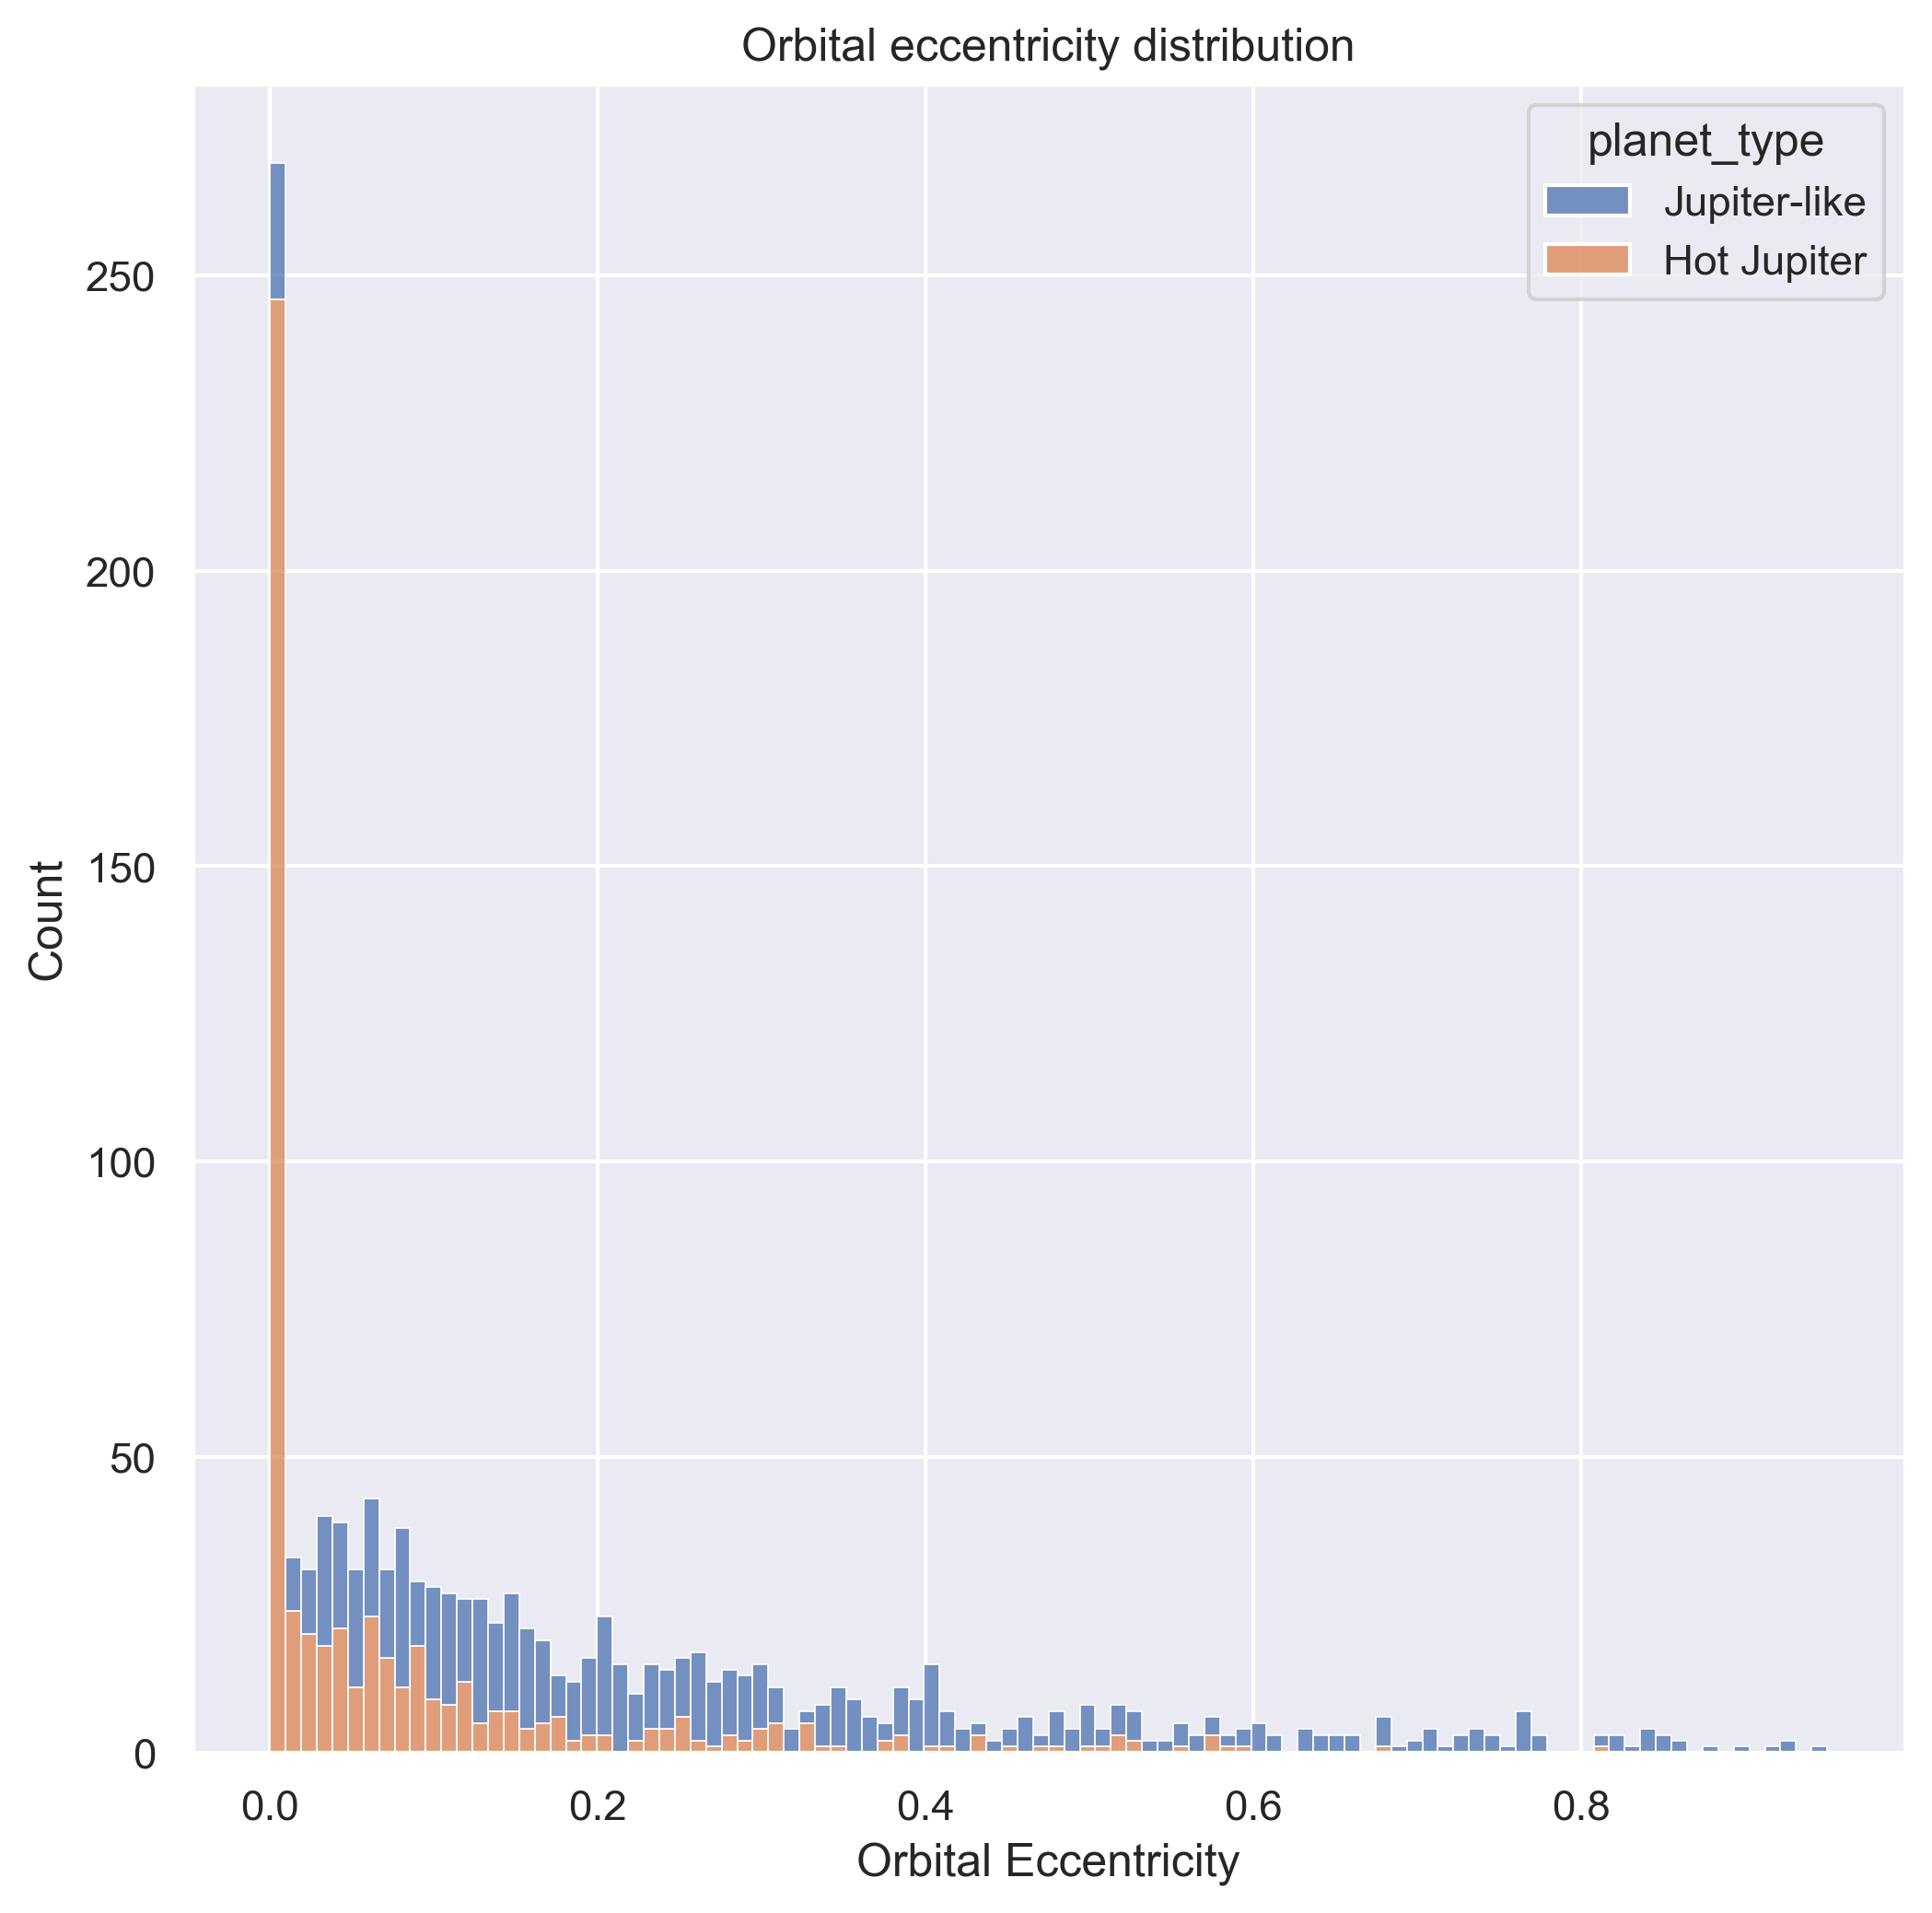

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)

sns.histplot(data=df_gas, x='pl_orbeccen', hue='planet_type', multiple='stack', bins=100, ax=ax)
ax.set_xlabel('Orbital Eccentricity')
ax.set_title('Orbital eccentricity distribution')

In [ ]:
df_temp = df_gas.dropna(subset=['pl_orbeccen'], inplace=False)

stats.pointbiserialr(list(map(lambda x: 0 if x == 'Jupiter-like' else 1, df_temp['planet_type'])), df_temp['pl_orbeccen'])

PointbiserialrResult(correlation=-0.4449530988872965, pvalue=5.891892596932067e-62)

Hot Jupiters tend to have low orbital eccentricity.


### Discovery year 

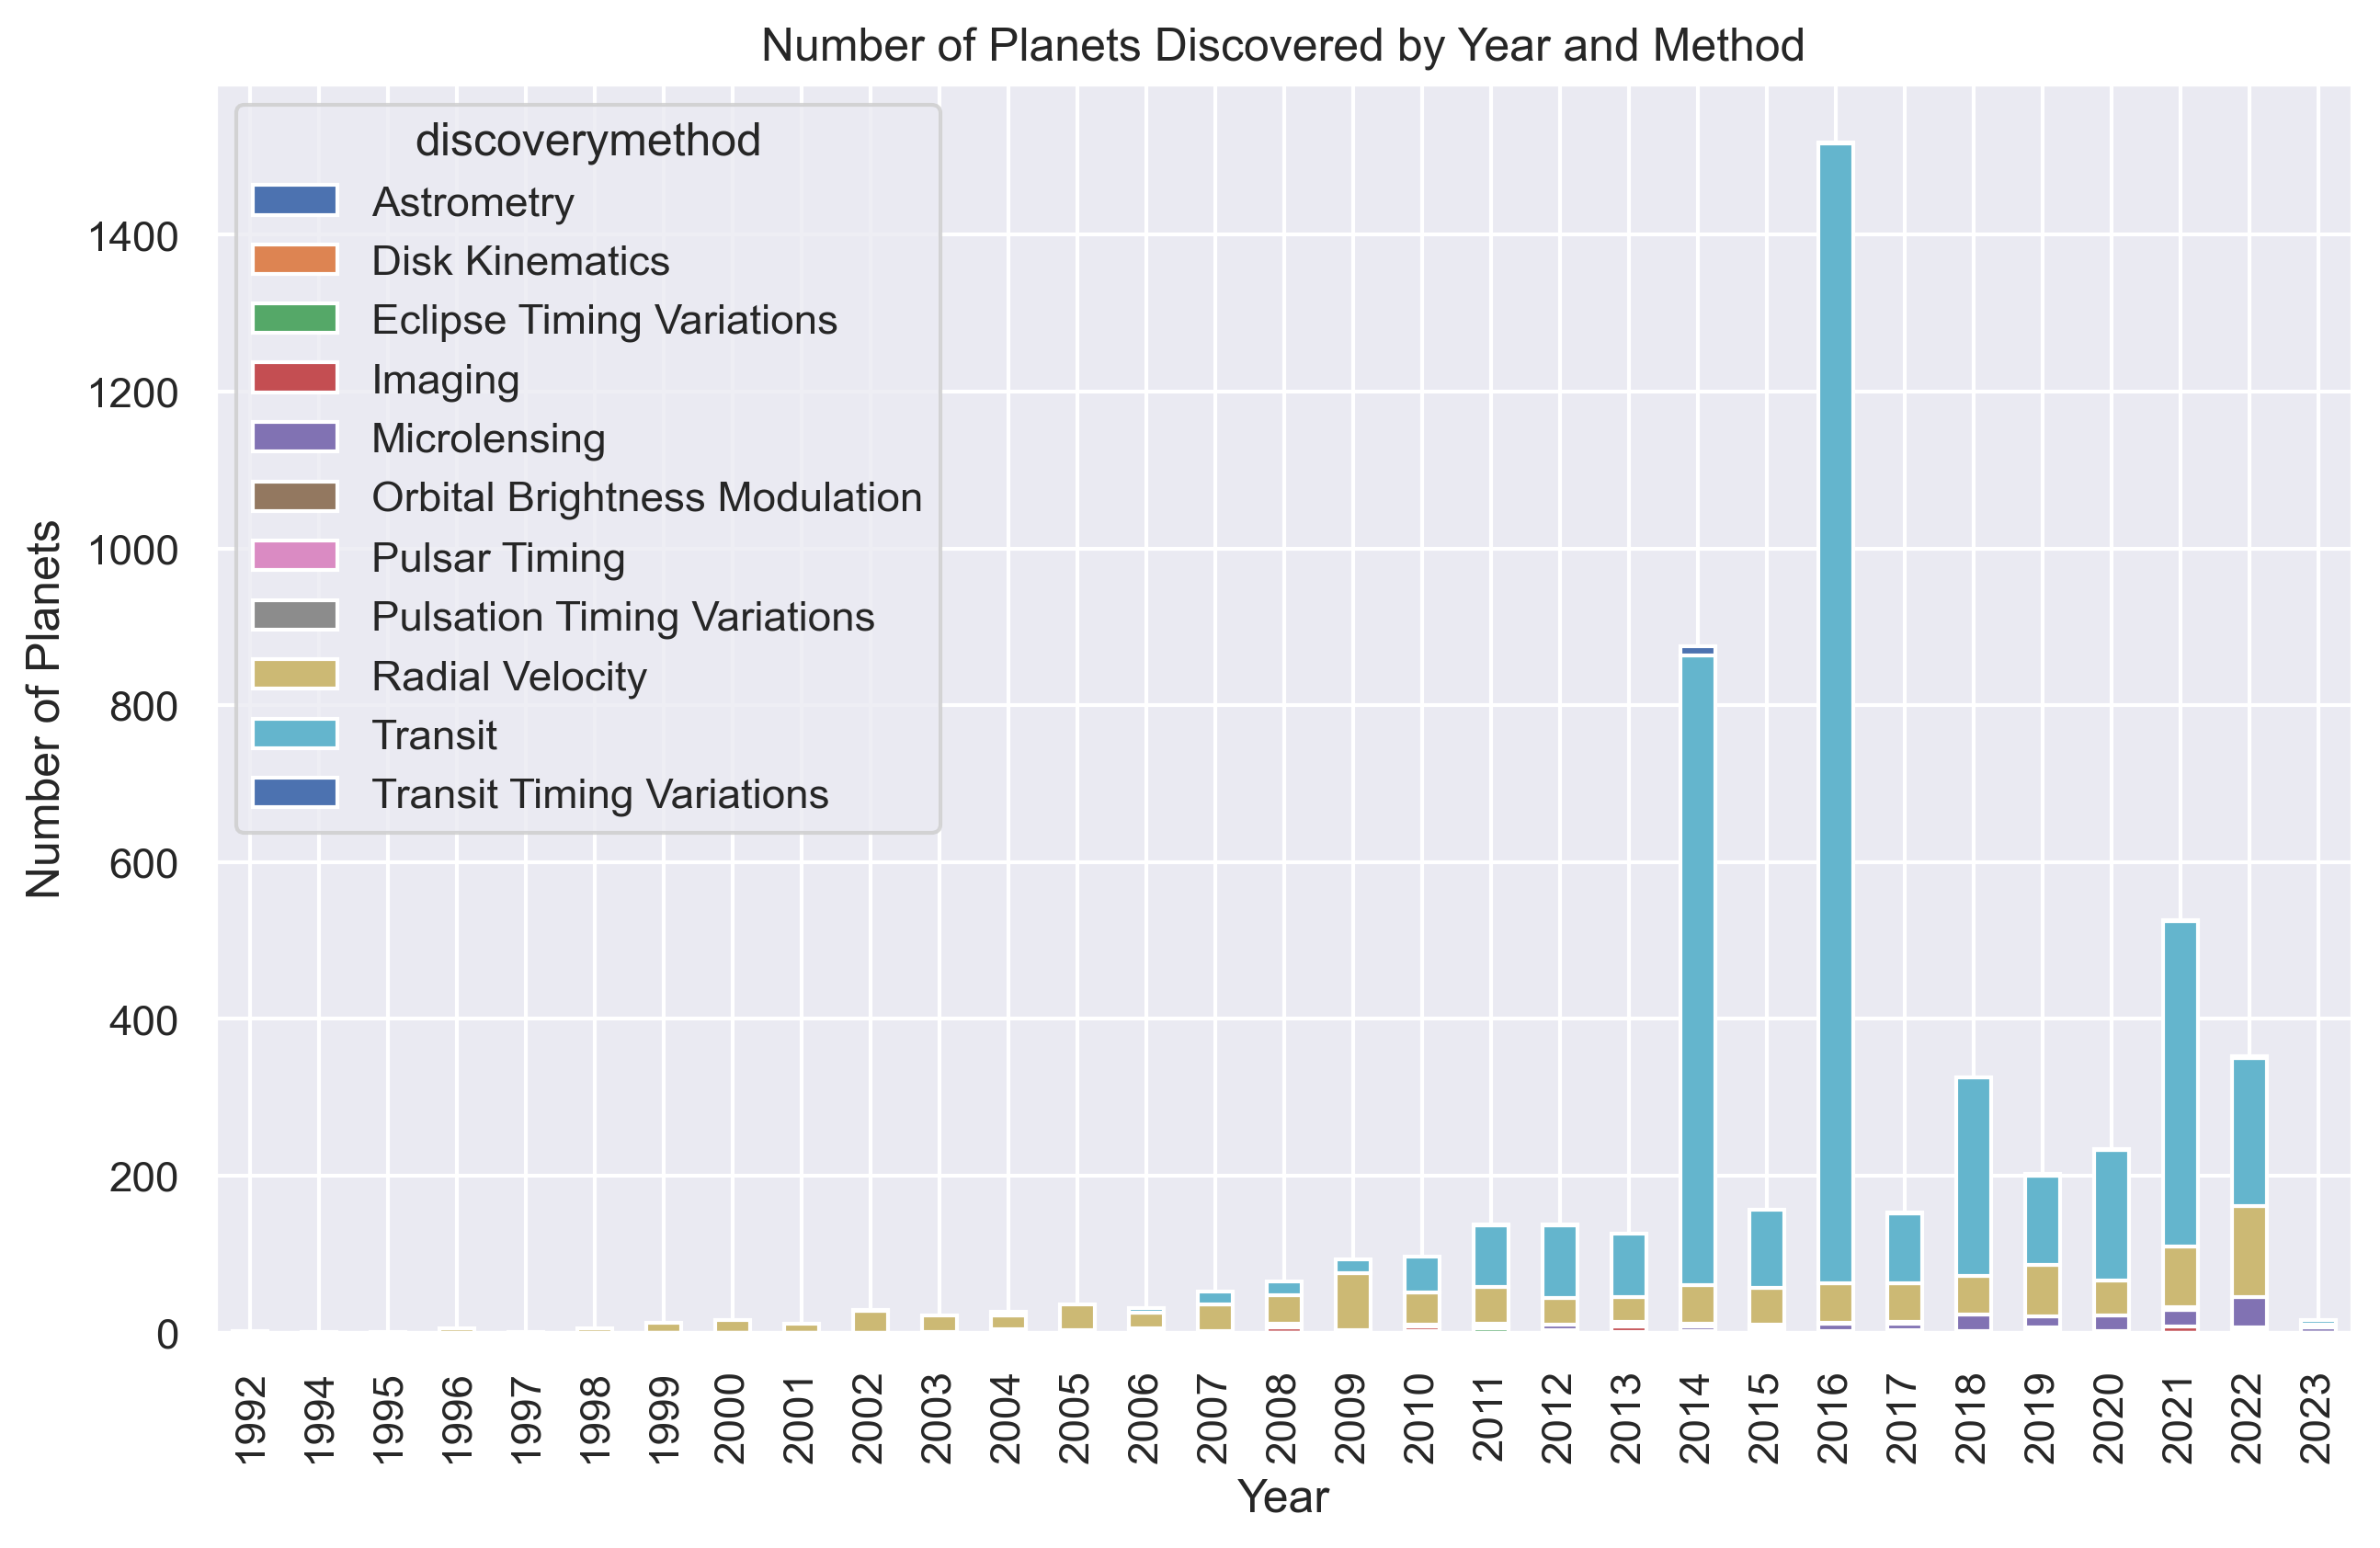

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
# create the countplot  
df.value_counts(['disc_year', 'discoverymethod']).unstack().plot(kind='bar', figsize=(10, 6), stacked=True, ax=ax)

# set the title and x/y-axis labels
ax.set_title('Number of Planets Discovered by Year and Method')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Planets')

# rotate x-axis tick labels to avoid overlapping
ax.tick_params(axis='x', rotation=90)

# display the plot
plt.show()